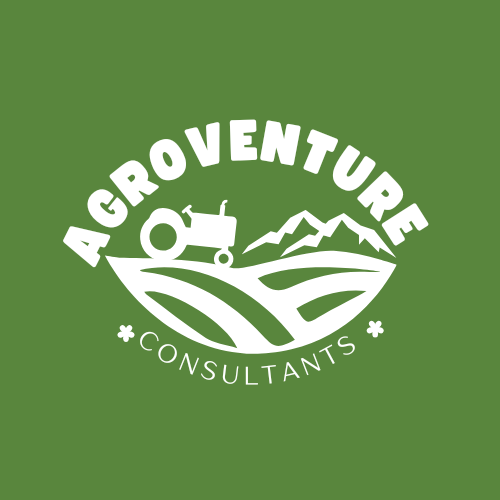

In [209]:
from IPython.display import Image
Image(filename='Agroventure consultants.png')

# <font color=blue>Carbon Emission Data Analysis</font>

<a id="cont></a>"

## Table of Contents

* [1. Project Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Data Pre-processing](#chapter6)
* [7. Model training and evaluation](#Chapter7)
  * [7.1 Multiple Linear Regression Model](#section_7_1)
  * [7.2 Decision tree Regression Model ](#section_7_2)
  * [7.3 Random Tree Forest Model](#section_7_3)
  * [7.4 Stacking ensemble Model](#section_7_4)
* [8. Model Perfomance Comparison](#Chapter8)
* [9. Conclusion](#Chapter9)
* [10. Recommendations](#Chapter10)
* [11. References](#Chapter11)

# <font color=red>1. Project Overview</font>

Analyze and predict CO2 emissions that are emitted from the agri-food sector.
The aim was to comprehend the impact of agricultural activities on climate change and develop strategies for sustainable practices
Use dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), to study different emission sources, perform regression analysis, make predictions on temperature variations, and draw significant insights.


# <font color=red>1.1 Introduction</font>

The effects  of global warming been one the major concerns for scientists. Effects previously predicted, include sea level rise, loss of sea ice, intense heat waves (IPCC, 2021; NASA, 2024).
The global temperature increase has been predicted to continue, it results from the greenhouse gases emissions including CO2 (NASA, 2024; Stern and Kaufmann, 2014; Zhu and Huo, 2022) Agriculture is reported second largest emitter of CO2, 2019, emissions are produced by activities such as livestock emission, deforestation, fossil fuel base fertilizers, and many others (Balsalobre-Lorente et al., 2019).
Studies have been conducted to analyze the contribution and impact of agricultural activities through time.
.


## 1.1.1 Problem Statement

- Agriculture, a vital sector for human sustenance and livelihood, is a contributing to the global warming crisis by emitting large amounts of greenhouse gases, primarily carbon dioxide (CO2), which exacerbate climate change. 
- The agriculture sector is responsible for approximately 24% of global greenhouse gas emissions, with the majority coming from the use of synthetic fertilizers and pesticides.
- As temperatures continue to rise, agriculture is not only vulnerable to climate-related disruptions but also a significant contributor to the problem.  

## 1.1.2 Objectives

- To identify the most effective strategies for reducing GHG emissions in agriculture.
- To develop a set of recommendations for policymakers, farmers, and other stakeholders on how to promote sustainable agriculture practices.
-  Use machine learning models to predict temperature variations and identify which model is more effective.

# <font color=red>2. Importing Packages</font>

Setting up our environment for data analysis and visualization is an important step in the initial stage of the project.The following packages and libraries were imported:

In [210]:
import pandas as pd # Importing the Pandas package with an alias, pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <font color=red> 3. Loading Data</font>

Loading data is the first step in data preparation. You need to load the data into your Python environment before you can start cleaning, processing, and analyzing it.

In [211]:
emissions_df=pd.read_csv("co2_emissions_from_agri.csv")

#Create a Dataframe called df
df = pd.DataFrame(emissions_df)

In [212]:
#prints the first few rows of the DataFrame
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

Creating a copy ensures that you don't alter the original data and maintain its integrity.A copy protects against accidental changes to the original Data Frame

In [213]:
# create a copy of the dataframe
df_copy = df.copy()

In [214]:
#prints the first few rows of the DataFrame
df_copy.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

# <font color=red> 4. Data cleaning</font>

Data cleaning allows for more accurate and reliable analysis. When data is clean, you can trust the results of your analysis and make more informed decisions.Data cleaning also helps identify and correct errors, such as missing values, duplicates, and inconsistencies, which can lead to incorrect analysis and conclusions.

In [215]:
#convert the 'Year' column to datetime format
df_copy['Year'] = pd.to_datetime(df_copy['Year'], format='%Y')

In [216]:
#Displays the data types of each column 
print(df_copy.dtypes)

Area                                       object
Year                               datetime64[ns]
Savanna fires                             float64
Forest fires                              float64
Crop Residues                             float64
Rice Cultivation                          float64
Drained organic soils (CO2)               float64
Pesticides Manufacturing                  float64
Food Transport                            float64
Forestland                                float64
Net Forest conversion                     float64
Food Household Consumption                float64
Food Retail                               float64
On-farm Electricity Use                   float64
Food Packaging                            float64
Agrifood Systems Waste Disposal           float64
Food Processing                           float64
Fertilizers Manufacturing                 float64
IPPU                                      float64
Manure applied to Soils                   float64


In [217]:
# checks for missing values in each column

missing_values=df_copy.isnull().sum()

print(missing_values)

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


There are missing values in the `Crop Residues`, `Savanna fires`, `Forest fires `, `Forestland `, `Food Household Consumption `, `IPPU`, `Manure applied to Soils`, `Manure Management`, `Fires in humid tropical forests`, `On-farm energy use` and `Net Forest conversion` columns .The next step is to deal with the missing values by filling them with the mean of the value above and below it

In [218]:
# define the column(s) with missing values
cols_with_missing = ['Crop Residues', 'Savanna fires', 'Forest fires',  'Forestland',  'Food Household Consumption',  'IPPU',  'Manure applied to Soils',  'Manure Management',  'Fires in humid tropical forests',  'On-farm energy use', 'Net Forest conversion']

# fill missing values with the mean
df_copy[cols_with_missing] = df_copy[cols_with_missing].fillna(df_copy[cols_with_missing].mean(), inplace=False)


In [219]:
# checks for missing values in each column
missing_values=df_copy.isnull().sum()

print(missing_values)

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [220]:
df_copy.head()

Area       Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan 1990-01-01        14.7237        0.0557       205.6077   
1  Afghanistan 1991-01-01        14.7237        0.0557       209.4971   
2  Afghanistan 1992-01-01        14.7237        0.0557       196.5341   
3  Afghanistan 1993-01-01        14.7237        0.0557       230.8175   
4  Afghanistan 1994-01-01        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0         3008.982252         9655167.0   
1                              0.0         3008.982252        10230490.0   
2                              0.0         3008.982252        10995568.0   
3                              0.0         3008.982252        11858090.0   
4                              0.0         3008.982252        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [221]:
#Check for duplicates
duplicates = df_copy.duplicated().sum()
print("The number of duplicate rows:", duplicates)

The number of duplicate rows: 0


In [222]:
df_copy = df_copy.rename(columns={'Crop Residues': 'crop_residues', 
                         'Rice Cultivation': 'rice_cultivation', 
                         'Net Forest conversion': 'net_forest_conversion',
                         'Average Temperature °C' : 'average_temperature',
                         'Rural population': 'rural_population',
                         'Urban population': 'urban_population',
                         'Area': 'area',
                         'Year': 'year',
                                  'Savanna fires': 'savanna_fires',
                                  'Forest fires': 'forest_fires',
                                  'Drained organic soils (CO2)': 'drained_organic_soils',
                                  'Pesticides Manufacturing': 'pesticides_manufacturing',
                                  'Food Transport': 'food_transport',
                                  'Forestland': 'forestland',
                                  'Food Household Consumption': 'food_household_consumption',
                                  'Food Retail': 'food_retail',
                                  'On-farm Electricity Use': 'on_farm_electricity_use',
                                  'Food Packaging': 'food_packaging',
                                  'Agrifood Systems Waste Disposal': 'agrifood_systems_waste_disposal',
                                  'Food Processing': 'food_processing',
                                  'Fertilizers Manufacturing': 'fertilizers_manufacturing',
                                  'IPPU': 'ippu',
                                  'Manure applied to Soils': 'manure_applied_to_soils',
                                  'Manure left on Pasture': 'manure_left_on_pasture',
                                  'Manure Management': 'manure_management',
                                  'Fires in organic soils': 'fires_in_organic_soils',
                                  'Fires in humid tropical forests': 'fires_in_humid_tropical_forests',
                                  'On-farm energy use': 'on_farm_energy_use',
                                  'Total Population - Male': 'total_population_male',
                                  'Total Population - Female': 'total_population_female' })


## 4.1 Final Data Checkup

Going over the data cleaning process to make sure that there are no mistakes


In [223]:
df_copy

area       year  savanna_fires  forest_fires  crop_residues  \
0     Afghanistan 1990-01-01        14.7237        0.0557       205.6077   
1     Afghanistan 1991-01-01        14.7237        0.0557       209.4971   
2     Afghanistan 1992-01-01        14.7237        0.0557       196.5341   
3     Afghanistan 1993-01-01        14.7237        0.0557       230.8175   
4     Afghanistan 1994-01-01        14.7237        0.0557       242.0494   
...           ...        ...            ...           ...            ...   
6960     Zimbabwe 2016-01-01      1190.0089      232.5068        70.9451   
6961     Zimbabwe 2017-01-01      1431.1407      131.1324       108.6262   
6962     Zimbabwe 2018-01-01      1557.5830      221.6222       109.9835   
6963     Zimbabwe 2019-01-01      1591.6049      171.0262        45.4574   
6964     Zimbabwe 2020-01-01       481.9027       48.4197       108.3022   

      rice_cultivation  drained_organic_soils  pesticides_manufacturing  \
0             686.0000                    0.0                 11.807483   
1             678.1600                    0.0                 11.712073   
2             686.0000                    0.0                 11.712073   
3             686.0000                    0.0                 11.712073   
4             705.6000                    0.0                 11.712073   
...                ...                    ...                       ...   
6960            7.4088                    0.0                 75.000000   
6961            7.9458                    0.0                 67.000000   
6962            8.1399                    0.0                 66.000000   
6963            7.8322                    0.0                 73.000000   
6964            7.9733                    0.0                 73.000000   

      food_transport  forestland  ...  manure_management  \
0            63.1152  -2388.8030  ...           319.1763   
1            61.2125  -2388.8030  ...           342.3079   
2            53.3170  -2388.8030  ...           349.1224   
3            54.3617  -2388.8030  ...           352.2947   
4            53.9874  -2388.8030  ...           367.6784   
...              ...         ...  ...                ...   
6960        251.1465  76500.2982  ...           282.5994   
6961        255.7975  76500.2982  ...           255.5900   
6962        327.0897  76500.2982  ...           257.2735   
6963        290.1893  76500.2982  ...           267.5224   
6964        238.7639  76500.2982  ...           266.7316   

      fires_in_organic_soils  fires_in_humid_tropical_forests  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   
...                      ...                              ...   
6960                     0.0                              0.0   
6961                     0.0                              0.0   
6962                     0.0                              0.0   
6963                     0.0                              0.0   
6964                     0.0                              0.0   

      on_farm_energy_use  rural_population  urban_population  \
0            3008.982252         9655167.0         2593947.0   
1            3008.982252        10230490.0         2763167.0   
2            3008.982252        10995568.0         2985663.0   
3            3008.982252        11858090.0         3237009.0   
4            3008.982252        12690115.0         3482604.0   
...                  ...               ...               ...   
6960          417.315000        10934468.0         5215894.0   
6961          398.164400        11201138.0         5328766.0   
6962          465.773500        11465748.0         5447513.0   
6963          444.233500        11725970.0         557152

In [224]:
#Check and validate the data types
df_copy.dtypes

area                                       object
year                               datetime64[ns]
savanna_fires                             float64
forest_fires                              float64
crop_residues                             float64
rice_cultivation                          float64
drained_organic_soils                     float64
pesticides_manufacturing                  float64
food_transport                            float64
forestland                                float64
net_forest_conversion                     float64
food_household_consumption                float64
food_retail                               float64
on_farm_electricity_use                   float64
food_packaging                            float64
agrifood_systems_waste_disposal           float64
food_processing                           float64
fertilizers_manufacturing                 float64
ippu                                      float64
manure_applied_to_soils                   float64


In [225]:
#Check for any missed missing values 
missing_values = df_copy.isnull().sum()
print(missing_values)

area                               0
year                               0
savanna_fires                      0
forest_fires                       0
crop_residues                      0
rice_cultivation                   0
drained_organic_soils              0
pesticides_manufacturing           0
food_transport                     0
forestland                         0
net_forest_conversion              0
food_household_consumption         0
food_retail                        0
on_farm_electricity_use            0
food_packaging                     0
agrifood_systems_waste_disposal    0
food_processing                    0
fertilizers_manufacturing          0
ippu                               0
manure_applied_to_soils            0
manure_left_on_pasture             0
manure_management                  0
fires_in_organic_soils             0
fires_in_humid_tropical_forests    0
on_farm_energy_use                 0
rural_population                   0
urban_population                   0
t

In [226]:
#Checking for duplicates again
duplicates = df_copy.duplicated().sum()
print(duplicates)

0


# <font color=red>5. Exploratory Data Analysis</font>

In this section, we will perform Exploratory Data Analysis (EDA) to understand the underlying structure and characteristics of the dataset. EDA is a crucial step in the data science workflow as it helps us to:

- Gain insights into the distribution and nature of the data.
- Identify patterns, trends, and relationships between variables.
- Detect outliers and anomalies that may influence our analysis.
- Formulate hypotheses and guide subsequent modeling steps.

We will employ a variety of statistical measures and visualization techniques to explore and summarize the data. With a comprehensive exploration, we will then be able to establish a strong foundation for subsequent modeling and decision-making processes.

### Univariate Analysis

##### Initial Data Overview
We first start with a basic overview of the dataset:

Shape of the Dataset: The dataset contains X rows and Y columns, giving us an idea of its size and complexity.

In [227]:
# Display the shape of the dataset
df_copy.shape

(6965, 31)

Here, we see that the our dataset has a total of 6965 rows and 31 columns.

First Few Rows: Display the first few rows to get a sense of the data structure and content.

In [228]:
# Display the first few rows of the dataset
df_copy.head()

area       year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan 1990-01-01        14.7237        0.0557       205.6077   
1  Afghanistan 1991-01-01        14.7237        0.0557       209.4971   
2  Afghanistan 1992-01-01        14.7237        0.0557       196.5341   
3  Afghanistan 1993-01-01        14.7237        0.0557       230.8175   
4  Afghanistan 1994-01-01        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils  pesticides_manufacturing  \
0            686.00                    0.0                 11.807483   
1            678.16                    0.0                 11.712073   
2            686.00                    0.0                 11.712073   
3            686.00                    0.0                 11.712073   
4            705.60                    0.0                 11.712073   

   food_transport  forestland  ...  manure_management  fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   fires_in_humid_tropical_forests  on_farm_energy_use  rural_population  \
0                              0.0         3008.982252         9655167.0   
1                              0.0         3008.982252        10230490.0   
2                              0.0         3008.982252        10995568.0   
3                              0.0         3008.982252        11858090.0   
4                              0.0         3008.982252        12690115.0   

   urban_population  total_population_male  total_population_female  \
0         2593947.0              5348387.0                5346409.0   
1         2763167.0              5372959.0                5372208.0   
2         2985663.0              6028494.0                6028939.0   
3         3237009.0              7003641.0                7000119.0   
4         3482604.0              7733458.0                7722096.0   

   total_emission  average_temperature  
0     2198.963539             0.536167  
1     2323.876629             0.020667  
2     2356.304229            -0.259583  
3     2368.470529             0.101917  
4     2500.768729             0.372250  

[5 rows x 31 columns]

We can see the columns that we are working with and the set up of the entire dataset.

Summary Statistics: Provide summary statistics for the numerical columns in our dataset.

In [229]:
df_copy.describe()

year  savanna_fires  forest_fires  \
count                           6965    6965.000000   6965.000000   
mean   2005-02-15 05:40:18.435032320    1188.390893    919.302167   
min              1990-01-01 00:00:00       0.000000      0.000000   
25%              1997-01-01 00:00:00       0.000000      0.000000   
50%              2005-01-01 00:00:00       1.690800      0.646500   
75%              2013-01-01 00:00:00     122.685600     78.057200   
max              2020-01-01 00:00:00  114616.401100  52227.630600   
std                              NaN    5234.597927   3695.155566   

       crop_residues  rice_cultivation  drained_organic_soils  \
count    6965.000000       6965.000000            6965.000000   
mean      998.706309       4259.666673            3503.228636   
min         0.000200          0.000000               0.000000   
25%        25.360100        181.260800               0.000000   
50%       193.083100        534.817400               0.000000   
75%       998.706309       1536.640000             690.408800   
max     33490.074100     164915.255600          241025.069600   
std      3310.818022      17613.825187           15861.445678   

       pesticides_manufacturing  food_transport     forestland  \
count               6965.000000     6965.000000    6965.000000   
mean                 333.418393     1939.581760  -17828.285678   
min                    0.000000        0.000100 -797183.079000   
25%                    6.000000       27.958600   -5960.829600   
50%                   13.000000      204.962800    -128.411600   
75%                  116.325487     1207.000900       0.000000   
max                16459.000000    67945.765000  171121.076000   
std                 1429.159367     5616.748808   78882.488294   

       net_forest_conversion  ...  manure_management  fires_in_organic_soils  \
count           6.965000e+03  ...        6965.000000             6965.000000   
mean            1.760564e+04  ...        2263.344946             1210.315532   
min             0.000000e+00  ...           0.432900                0.000000   
25%             0.000000e+00  ...          52.707800                0.000000   
50%             1.259940e+02  ...         427.217100                0.000000   
75%             9.877472e+03  ...        2263.344946                0.000000   
max             1.605106e+06  ...       70592.646500           991717.543100   
std             9.751121e+04  ...        7429.808959            22669.847760   

       fires_in_humid_tropical_forests  on_farm_energy_use  rural_population  \
count                      6965.000000         6965.000000      6.965000e+03   
mean                        668.452931         3008.982252      1.785774e+07   
min                           0.000000            0.031900      0.000000e+00   
25%                           0.000000           17.738200      9.731100e+04   
50%                           0.000000          282.527900      1.595322e+06   
75%                          20.284300         3008.982252      8.177340e+06   
max                       51771.256800       248879.176900      9.000991e+08   
std                        3228.341292        11738.409960      8.901521e+07   

       urban_population  total_population_male  total_population_female  \
count      6.965000e+03           6.965000e+03             6.965000e+03   
mean       1.693230e+07           1.761963e+07             1.732447e+07   
min        0.000000e+00           2.500000e+02             2.700000e+02   
25%        2.173860e+05           2.013260e+05             2.078900e+05   
50%        2.357581e+06           2.469660e+06             2.444135e+06   
75%        8.277123e+06           9.075924e+06             9.112588e+06   
max        9.020778e+08           7.435866e+08             7.133419e+08   
std        6.574362e+07           7.603993e+07             7.251711e+07   

       total_emission  average_temperature  
count    6.965000e+03          6965.000000  
mean     6.409124e+04

For the year column, we see that 1990 is our min year and 2020 is our max year, showing us the period of time we are looking at. We also notice that many of our columns have 0 as the min value meaning its possible that there was no data for certain years in certain countries. Additionally our range of total emissions is from 6.409124e+04 to 3.115114e+06 kilotons, while with average temperature our data points lie between 0.872989 and 3.558083 degrees celsius.

Unique Values: Show the number of unique values for categorical columns.

In [230]:
# Display the number of unique values per column
df_copy.nunique()

area                                236
year                                 31
savanna_fires                      3747
forest_fires                       2963
crop_residues                      5359
rice_cultivation                   3635
drained_organic_soils              2147
pesticides_manufacturing           1310
food_transport                     6512
forestland                          606
net_forest_conversion               443
food_household_consumption         6359
food_retail                        6459
on_farm_electricity_use            5322
food_packaging                     3704
agrifood_systems_waste_disposal    6419
food_processing                    3542
fertilizers_manufacturing          2973
ippu                               6027
manure_applied_to_soils            5928
manure_left_on_pasture             5922
manure_management                  5932
fires_in_organic_soils              126
fires_in_humid_tropical_forests    1737
on_farm_energy_use                 5559


This creates a variable named numerical_columns that stores only the numerical columns (floats and integers) from the DataFrame df_copy.

In [231]:
numerical_columns_copy = df_copy.select_dtypes(include=['float64', 'int64'])

 KDE plots provide a smooth estimate of the probability density function (PDF) of a continuous variable. They offer a visual representation of the distribution of data, allowing to quickly assess key characteristics such as central tendency, spread, and multimodality. Below we look at the KDE plots for the numerical columns in our dataset.

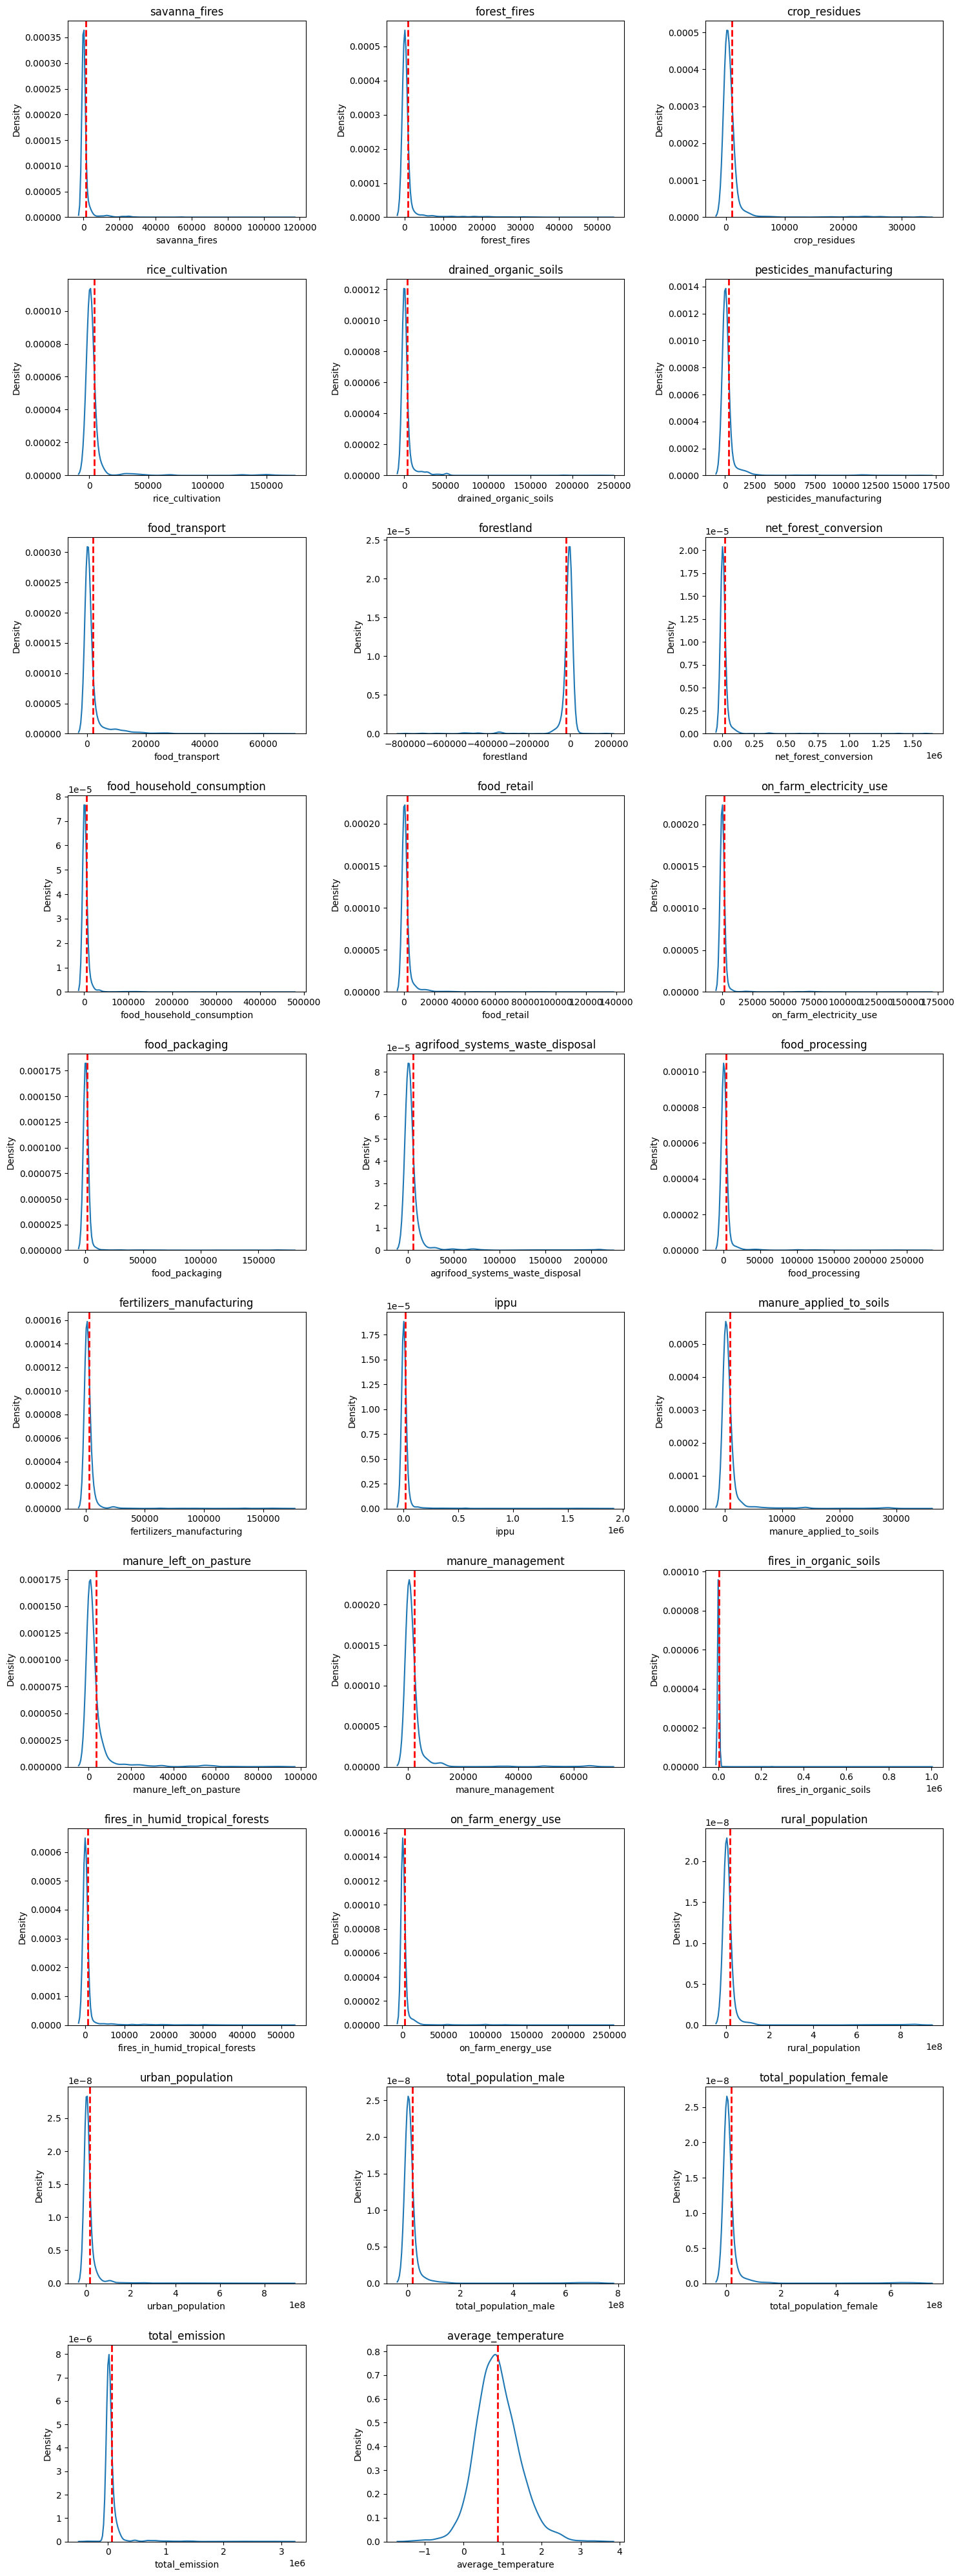

In [232]:
# Setting up a grid of plots
num_cols = 3
num_rows = (len(numerical_columns_copy.columns) // num_cols) + (1 if len(numerical_columns_copy.columns) % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows)) 
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting a KDE for each column in its respective subplot
for i, column in enumerate(numerical_columns_copy.columns):
    sns.kdeplot(data=numerical_columns_copy[column], ax=axes[i])
    axes[i].set_title(column)
    mean_val = numerical_columns_copy[column].mean()
    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=2)

# Hide extra subplots if there are fewer numerical columns than subplots
for j in range(len(numerical_columns_copy.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

These plots show a single sharp peak, indicating a unimodal distribution centered around the mean of the data. The distributions are very narrow, suggesting low variability around the central value. The only difference comes with average temperature where the plot is distinctly different from the others, showing a bell-shaped curve typical of a normal distribution. The peak is centered around a value slightly above zeroand the distribution is symmetric around this central mean value.
Overall, most of the KDE plots in the visual are sharply peaked and centered around the mean, indicating that the data points in these categories are closely clustered around the mean or median.

We can further investigate the distribution by looking at the violin plots for our respective columns.

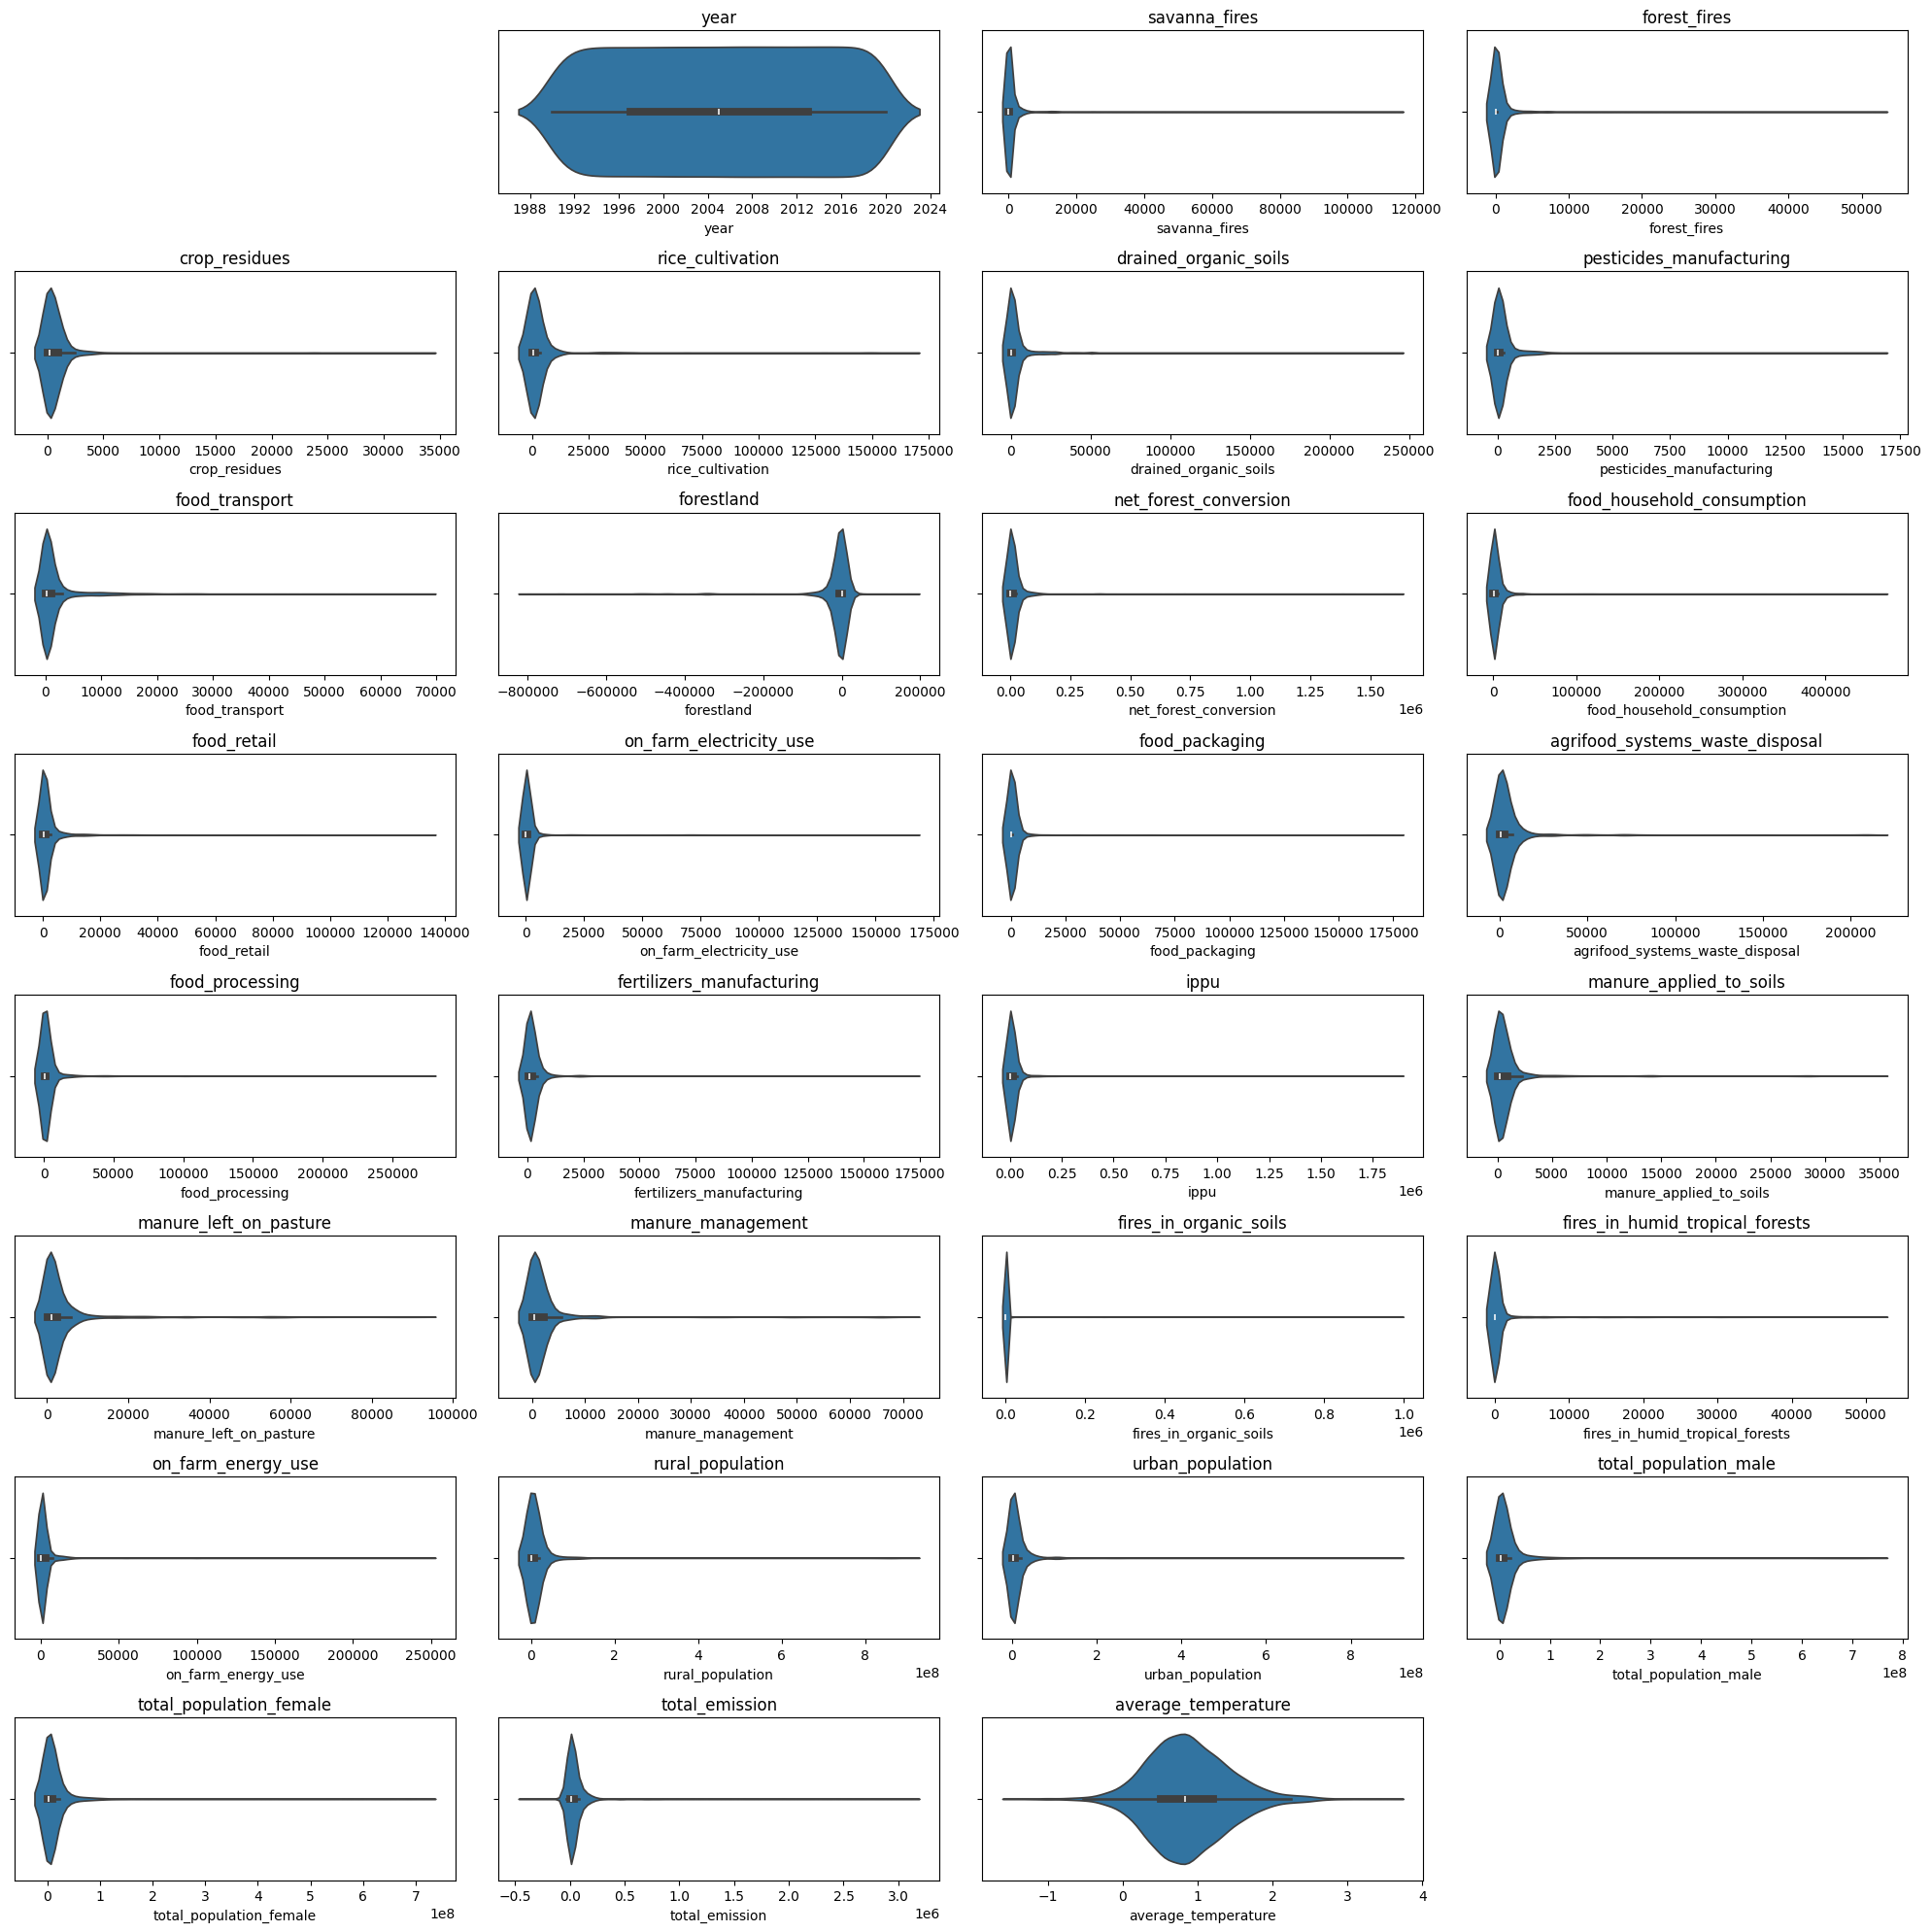

In [233]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(df_copy.columns):
    if df_copy[column].dtype != 'object':
        plt.subplot(8, 4, i + 1)
        sns.violinplot(x=df_copy[column])
        plt.title(column)
plt.tight_layout()
plt.show()

The violin plot further highlights what was suggested with the KDE plots. A narrow body indicates that most of the data points are clustered around the median/mean. The long tail on the right also suggests the presence of outliers, which are data points that fall significantly outside the IQR. This seen for almost all plots except for years and average temperature where our data points are more varied. The consistent violin shapes across all columns imply a similar underlying distribution for the data in each column. This means the data in each column likely shares characteristics like being centered around 0 and having a positive skew.


In order to get a better understanding of the data, we find how many countries we are looking at in terms of CO2 emissions in the 30 year period.

In [234]:
# Count the number of unique countries
num_countries = df_copy['area'].nunique()

# Print the result
print("Number of unique countries:", num_countries)

Number of unique countries: 236


We also look at the total CO2 emissions over the full 30 year period from all 236 countries.

In [235]:
total_emission = df_copy['total_emission'].sum()
print("Total CO2 emissions for all included countries from 1990 to 2020:", round(total_emission))

Total CO2 emissions for all included countries from 1990 to 2020: 446395515


In order to further investigate how the total emissions have been distributed over time and what the trend has been, we look at a bar plot as seen below.

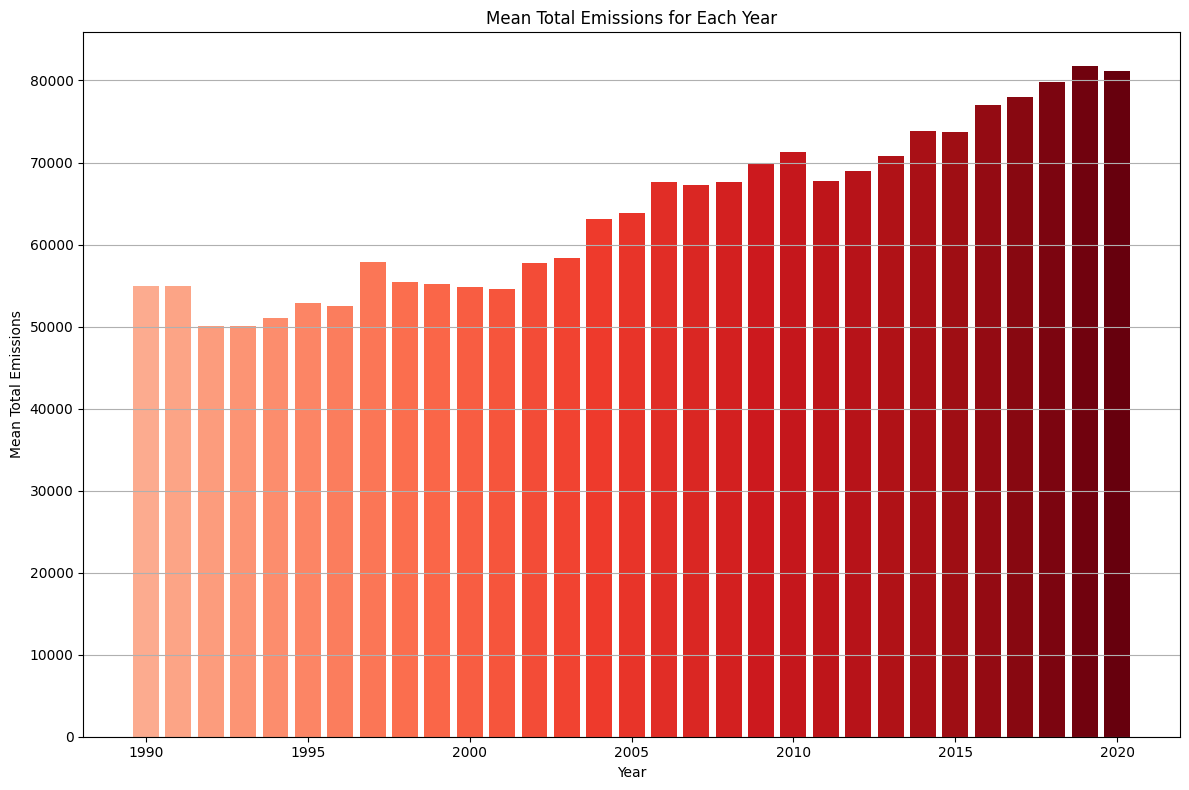

In [236]:
# Group data by the year extracted from the datetime column and calculate the mean total emissions for each year
mean_emissions_by_year_all = df_copy.groupby(df_copy['year'].dt.year)['total_emission'].mean()

# Normalize the years to create a gradient
years = mean_emissions_by_year_all.index
norm = plt.Normalize(years.min(), years.max())

# Use a subset of the Reds colormap to avoid very light colors
cmap = plt.cm.Reds
colors = cmap(norm(years) * 0.7 + 0.3)  # Adjust the range to make colors darker

# Plotting
plt.figure(figsize=(12, 8))

# Plotting the bar graph with gradient colors
plt.bar(mean_emissions_by_year_all.index, mean_emissions_by_year_all.values, color=colors)

plt.xlabel('Year')
plt.ylabel('Mean Total Emissions')
plt.title('Mean Total Emissions for Each Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This bar graph shows the trend of total CO2 emissions from 1990 to 2020. The graph highlights a continuous increase in emissions over the 30-year period. This rise is primarily due to industrialization and intensified agricultural activities over the years in a more modern world. Understanding this trend is crucial as it sets the stage for our analysis of the contributing factors. 

Consistent Growth: The steady upward trajectory indicates that global CO2 emissions have been rising almost every year. This reflects still, ongoing industrialization, increased energy consumption, and population growth however, occasional plateaus and dips can be observed, which may correspond to economic recessions, significant policy interventions, or global events such as the financial crisis of 2008-2009.

 By summing the values in each column (excluding the 'year' column), we can understand the total contribution of each column to the dataset. This is particularly useful when dealing with numerical data, as it provides insights into the overall magnitude of each variable.

In [237]:
# Sum of each column excluding 'year'
column_sums_excluding_year = df_copy.drop(columns=['year']).sum(numeric_only=True).sort_values(ascending=False)
print("Sum of each column (excluding 'year') in descending order:")
print(column_sums_excluding_year)

Sum of each column (excluding 'year') in descending order:
rural_population                   1.243791e+11
total_population_male              1.227207e+11
total_population_female            1.206649e+11
urban_population                   1.179334e+11
total_emission                     4.463955e+08
ippu                               1.392408e+08
net_forest_conversion              1.226233e+08
agrifood_systems_waste_disposal    4.191847e+07
food_household_consumption         3.376340e+07
rice_cultivation                   2.966858e+07
food_processing                    2.697353e+07
manure_left_on_pasture             2.450306e+07
drained_organic_soils              2.439999e+07
fertilizers_manufacturing          2.114381e+07
on_farm_energy_use                 2.095756e+07
manure_management                  1.576420e+07
food_retail                        1.423096e+07
food_transport                     1.350919e+07
food_packaging                     1.155236e+07
on_farm_electricity_use      

We see that from the population data, the rural population has the highest sum while the ippu has highest the emission sums (apart from total emissions). Forestland is the only negative sum.

To visualise this better, we plot it as a bar graph below:

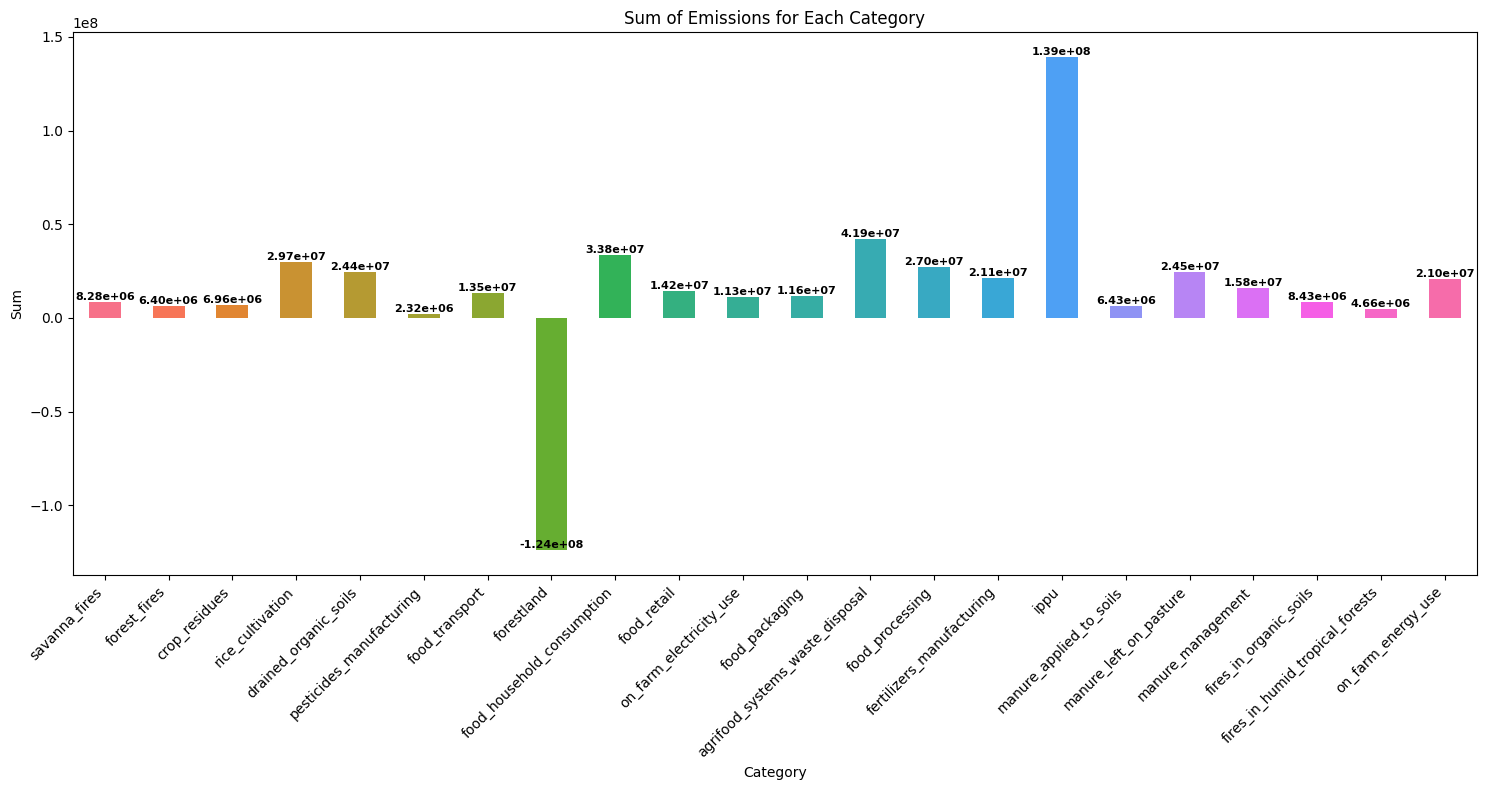

In [238]:
# Filter out columns to exclude
excluded_columns = ['rural_population', 'total_population_male', 'total_population_female',
                    'average_temperature', 'total_emission', 'urban_population', 'area', 'year', 'net_forest_conversion']  

# Filter columns to include in the bar plot
columns_to_include = [col for col in df_copy.columns if col not in excluded_columns]

# Calculate sums of each column
column_sums = df_copy[columns_to_include].sum()

# Plot the sums on a bar plot
plt.figure(figsize=(15, 8))
palette = sns.color_palette("husl", len(column_sums)) 
column_sums.plot(kind='bar', color=palette)
plt.title('Sum of Emissions for Each Category')
plt.xlabel('Category')
plt.ylabel('Sum')

# Add data labels with smaller font size
for i, value in enumerate(column_sums):
    plt.text(i, value, f'{value:.2e}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart breaks down total CO2 emissions by different sources.

IPPU Dominance: Industrial Processes and Product Use (IPPU) is the largest contributor to CO2 emissions. This sector includes emissions from chemical processes, metal production, and other manufacturing activities. This also suggests that any effective emissions reduction strategy must addresss the ippu sector comprehensively.
Waste Disposal: Significant emissions come from waste management practices, including landfills, waste incineration, and sewage treatment.
Household Consumption: Emissions from residential energy use and personal transportation underscore the collective impact of individual behavior on global emissions. It also highlights that the population, as expected, is a huge factor when it comes to total emissions and we expect larger populations to experience higher total emissions.
Forestland: Negative values for forestland indicate that forests act as carbon sinks, absorbing more CO2 than they emit, which highlights the importance of preserving and expanding forest areas and the dual role of land uses in either contributing to or mitigating emissions. It also highlights the need for policies aimed at preventing deforestation and encouraging reforestation to enhance this natural absorption of CO2.

To further look at proportionality and percentages we take a look at a treemap visualisation highlighting this:

In [239]:
pip install squarify

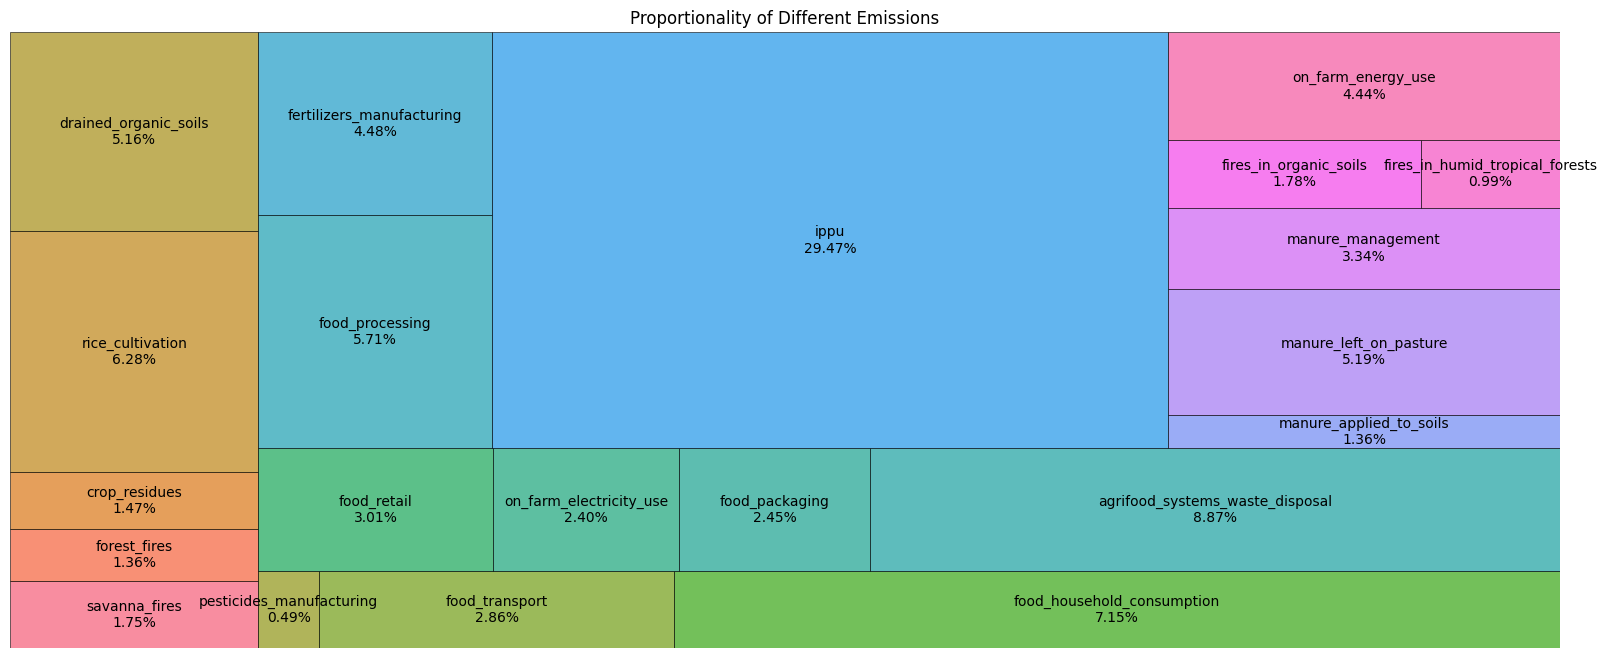

In [240]:
import squarify
# Filter out columns to exclude
excluded_columns_tree = ['rural_population', 'total_population_male', 'total_population_female',
                         'average_temperature', 'total_emission', 'urban_population', 'area', 'year', 'net_forest_conversion', 'forestland']

# Filter DataFrame to include only desired columns
filtered_tree_df = df_copy.drop(columns=excluded_columns_tree)

# Calculate sum of emissions for each type of emission
emissions_sum = filtered_tree_df.sum()

# Calculate percentages
total_emissions = emissions_sum.sum()
emissions_percentages = emissions_sum / total_emissions * 100

# Combine the labels with their percentages
labels = [f'{label}\n{percentage:.2f}%' for label, percentage in zip(emissions_sum.index, emissions_percentages)]

# Define color palette
palette = sns.color_palette("husl", len(emissions_sum))


# Plotting the treemap with custom colors and outlines
plt.figure(figsize=(20, 8))
ax = plt.gca()
squarify.plot(sizes=emissions_sum.values, label=labels, alpha=0.8, color=palette, ax=ax, text_kwargs={'fontsize':10})

# Get the patches objects (rectangles)
patches = ax.patches

# Add outline to each rectangle
for patch in patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

plt.axis('off')  # Turn off axis
plt.title('Proportionality of Different Emissions')
plt.show()

The treemap further elucidates the proportional contributions of various emission sources.

Again, we see, IPPU is the largest contributor at 30 %, followed by waste disposal at 8.87 % and household consumption at 7.15 %.

This further highlights the need to possibly look to prioritizing emission reduction in the largest contributing sectors to lead to substantial overall reductions.
It is worth also noting that there is potential to explore waste management and household practices for reducing emissions.


- Industrial Dominance: The dominance of IPPU highlights the significant impact of industrial activities on CO2 emissions. This suggests that any effective emission reduction strategy must address industrial processes and product use comprehensively.
- Waste Management: The substantial contribution from waste disposal emphasizes the need for improved waste management practices. Reducing landfill waste and increasing recycling and composting efforts could significantly lower emissions from this sector.
- Household Consumption: Emissions from household consumption underscore the collective impact of individual behaviors on the environment. Promoting sustainable consumer habits and energy-efficient appliances can contribute to lowering household emissions.
- Forestry's Role: The negative values for forestland reaffirm the importance of preserving and expanding forest areas. Forests act as critical carbon sinks, helping to offset emissions from other sources. Policies aimed at preventing deforestation and encouraging reforestation can enhance this natural absorption of CO2.
- Sector-Specific Strategies: Each sector identified in this breakdown requires tailored strategies for emission reduction. For example, in the industrial sector, adopting cleaner technologies and improving energy efficiency can be effective, while in the household sector, awareness campaigns and incentives for green practices could make a significant difference.
- Policy Implications: These insights can inform policymakers on where to focus regulatory efforts and resources. For instance, stricter regulations on industrial emissions, investment in waste management infrastructure, and incentives for sustainable household practices can collectively drive down CO2 emissions.

### Multivariate Analysis

##### Socio-environmental Relationship

Investigating the relationship between populations and emissions helps us grasp how human settlement patterns, such as urbanization, relate to environmental outcomes like emissions. This understanding is crucial for developing effective environmental policies and urban planning strategies.In order to investigate the relationship between urban/rural populations and emissions, we look at a scatter plot below:

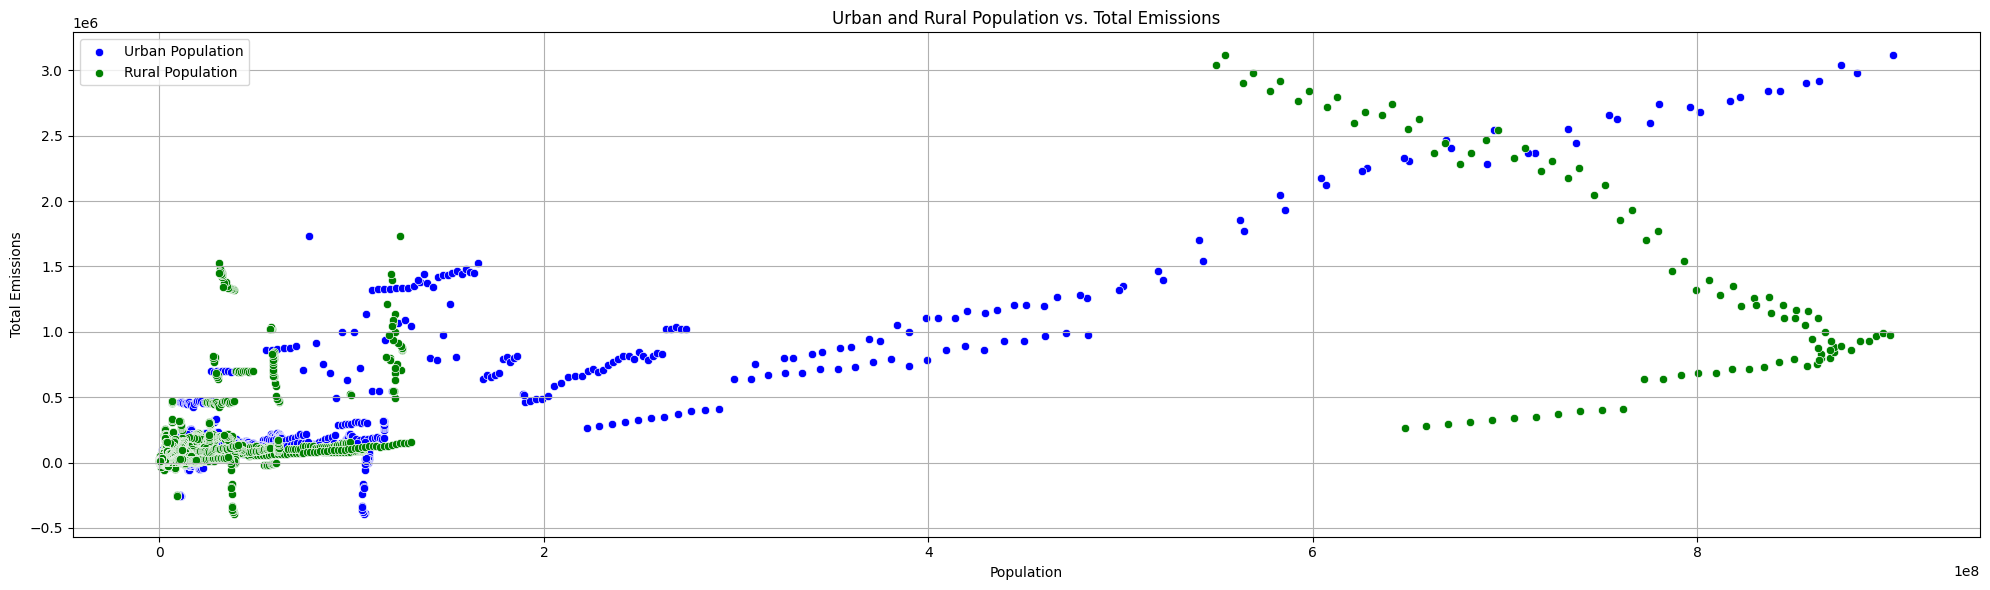

In [241]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Create a scatter plot with urban population
sns.scatterplot(data=df_copy, x='urban_population', y='total_emission', label='Urban Population', color='blue')

# Add scatter plot with rural population on the same plot
sns.scatterplot(data=df_copy, x='rural_population', y='total_emission', label='Rural Population', color='green')

plt.title('Urban and Rural Population vs. Total Emissions')
plt.xlabel('Population')
plt.ylabel('Total Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Urban vs. Rural Population Distribution:

The blue dots represent the urban population, and the green dots represent the rural population.
There is a wider distribution of total emissions among the urban population compared to the rural population.

For both urban and rural populations, total emissions generally increase with population size.
Urban populations show a more consistent and linear increase in total emissions as the population grows while rural populations exhibit a more varied relationship with total emissions, with some points showing higher emissions at lower population sizes and a decrease in emissions at higher population sizes.

At lower population sizes, rural areas can have higher total emissions than some urban areas however, as population size increases, urban areas tend to have higher total emissions overall.

Urban areas are significant contributors to total emissions, likely due to higher energy consumption, transportation, industrial activities, and other factors associated with dense populations.
The linear trend in urban emissions suggests a direct relationship between urban population growth and increased emissions

On the other hand the variability in rural emissions indicates that other factors besides population size, such as agricultural practices, land use changes, and energy sources, significantly influence emissions.
Rural areas with lower populations can sometimes have high emissions, potentially due to extensive agricultural activities or deforestation.

The different trends between urban and rural populations suggest the need for tailored strategies to reduce emissions in these areas.
Urban areas might benefit from policies focused on energy efficiency, public transportation, and industrial emissions control.
Rural areas could see improvements from sustainable agricultural practices, reforestation projects, and the adoption of renewable energy sources.

We can further investigate these relationships and its trends over time using temporal analysis.

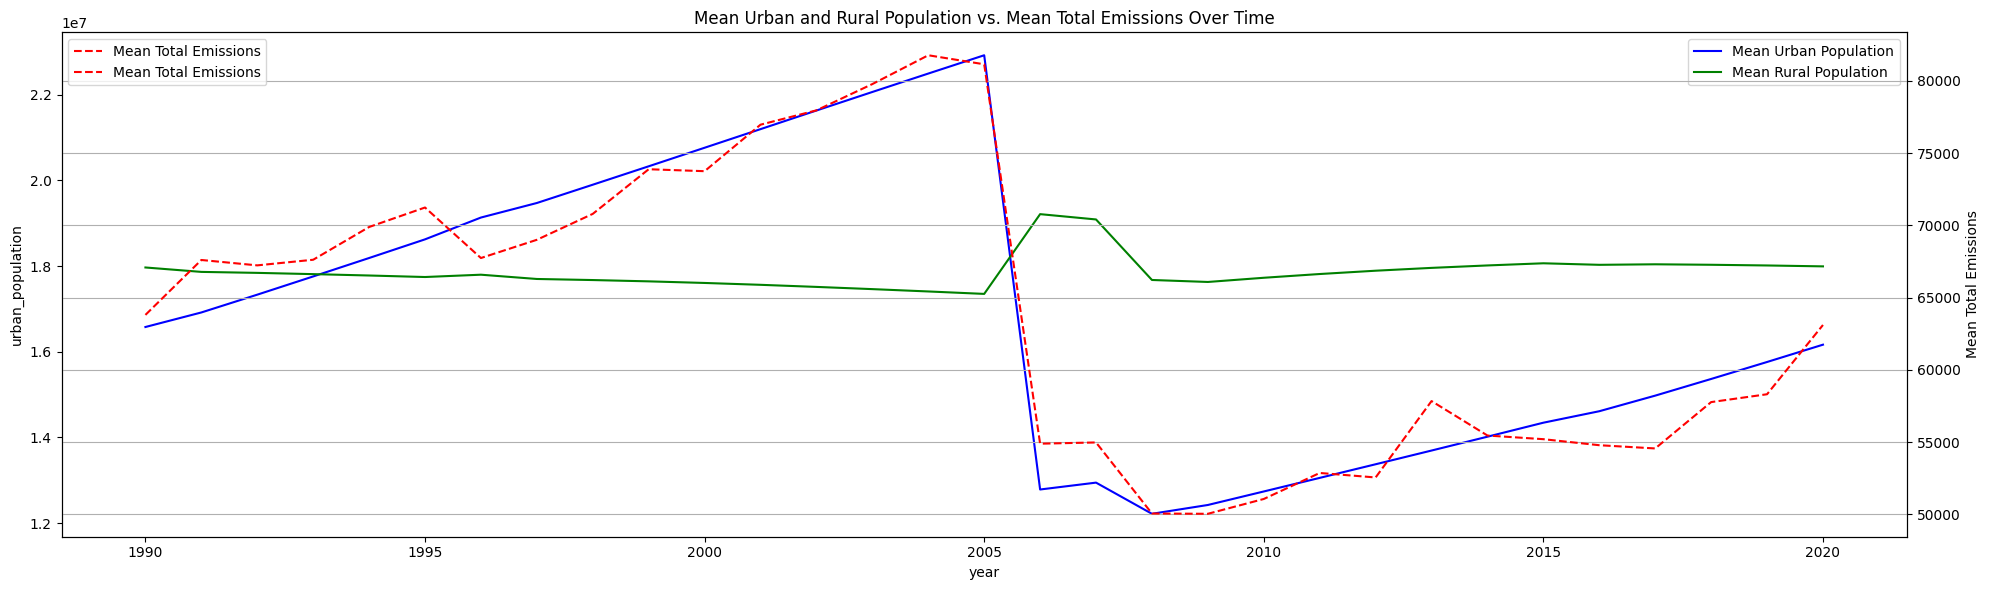

In [242]:
# Calculate the mean of urban and rural populations for each year
mean_urban_population = df_copy.groupby(df_copy['year'].dt.year)['urban_population'].mean()
mean_rural_population = df_copy.groupby(df_copy['year'].dt.year)['rural_population'].mean()

# Calculate the mean of total emissions for each year
mean_total_emission = df_copy.groupby(df_copy['year'].dt.year)['total_emission'].mean()

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the mean trend of urban population over time
sns.lineplot(data=df_copy, x=df_copy['year'].dt.year, y=mean_urban_population, label='Mean Urban Population', color='blue')

# Plot the mean trend of rural population over time
sns.lineplot(data=df_copy, x=df_copy['year'].dt.year, y=mean_rural_population, label='Mean Rural Population', color='green')

# Create a secondary y-axis for total emissions
ax2 = plt.gca().twinx()

# Plot the mean trend of total emissions over time on the secondary y-axis
sns.lineplot(data=df_copy, x=df_copy['year'].dt.year, y=mean_total_emission, label='Mean Total Emissions', color='red', linestyle='--', ax=ax2)

# Set labels for the primary and secondary y-axes
plt.ylabel('Mean Population')
ax2.set_ylabel('Mean Total Emissions')

# Add legends
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Mean Urban and Rural Population vs. Mean Total Emissions Over Time')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Urban vs. Rural Population Trends:

The urban population (blue line) shows a steady increase from 1990 until around 2010, after which it experiences a sharp rise until 2015, followed by a slight decline and then a steady increase again.
The rural population (green line), in contrast, remains relatively stable throughout the period, with minor fluctuations.
The total emissions (red dashed line) increase gradually from 1990 until around 2005. There is a sharp drop in emissions around 2010, which could be due to global economic downturns, policy changes, or improvements in emission control technologies. Post-2010, emissions decrease until around 2015, after which they begin to rise again, following a similar trend to the urban population increase.

The correlation between the rise in urban population and total emissions suggests that urbanization might be a significant driver of emissions. This could be due to increased energy consumption, transportation needs, and industrial activities in urban areas.
The stability of the rural population and its low correlation with emissions indicates that rural areas might not be significant contributors to total emissions, or that their emission contributions are stable.

#### Forest-ecosystem and Total emissions

Forests play a crucial role in mitigating climate change by storing carbon. By analyzing the relationship between forestland/net forest conversion and emissions, we can identify strategies to reduce emissions, such as reforestation efforts or sustainable forest management practices. We look at the relationship between forestland/net forest conversion and total emissions below:

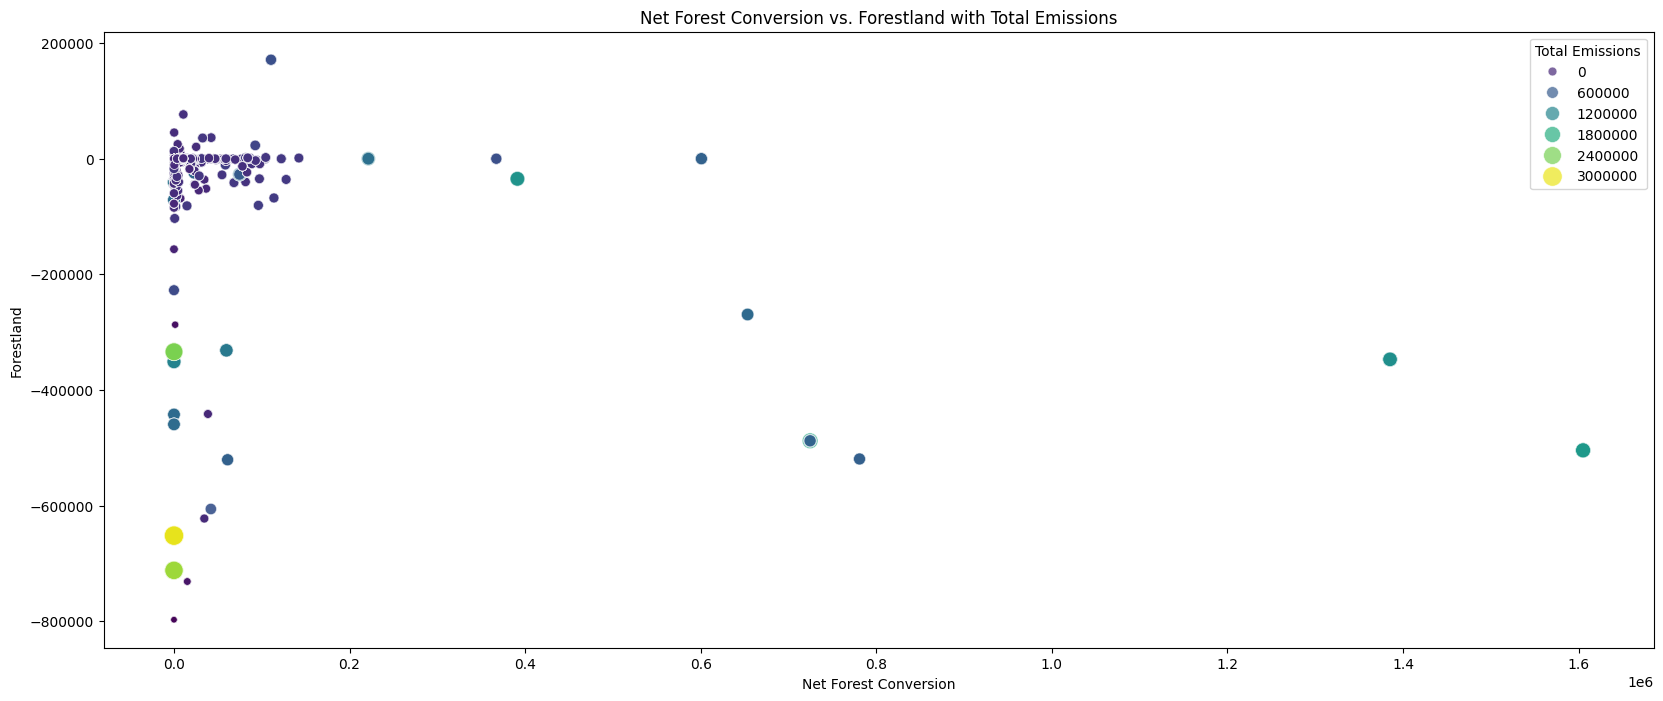

In [243]:
plt.figure(figsize=(20, 8))

# Define color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Create the scatter plot with color encoding
sns.scatterplot(data=df_copy, x='net_forest_conversion', y='forestland', size='total_emission', sizes=(20, 200), alpha=0.7, hue='total_emission', palette=palette)

plt.title('Net Forest Conversion vs. Forestland with Total Emissions')
plt.xlabel('Net Forest Conversion')
plt.ylabel('Forestland')
plt.legend(title='Total Emissions', loc='upper right')
plt.show()

The x-axis represents the Net Forest Conversion, presumably measured in hectares or a similar unit.
The y-axis represents the Forestland, likely also measured in hectares.
Data points are colored based on Total Emissions, with a color gradient from purple (low emissions) to yellow (high emissions).

Most data points are clustered around the lower values of Net Forest Conversion (close to 0), indicating that for most observations, the net change in forest area is minimal.
There is a significant spread along the y-axis (Forestland), suggesting a wide variation in the amount of forestland across the dataset.
A few outliers are visible with high Net Forest Conversion values, indicating significant forest area changes in those instances.

Larger bubbles, which represent higher total emissions, are generally found at lower values of Net Forest Conversion. This might suggest that countries with minimal net change in forest area have higher total emissions.
The largest emissions (yellow points) are associated with significant negative values on the y-axis, possibly indicating deforestation activities where forestland is being converted to non-forest uses.

The negative correlation between forestland and high emissions in some data points again, suggests that deforestation might be linked to higher CO2 emissions. This is critical as deforestation not only contributes to CO2 emissions directly but also reduces the carbon sequestration capacity of the environment.

Temporal analysis allows us to identify trends and patterns in the relationship over time. We can observe how changes in forestland and net forest conversion correspond to fluctuations in emissions, providing valuable insights into the dynamics of land-use change and its impact on the environment.

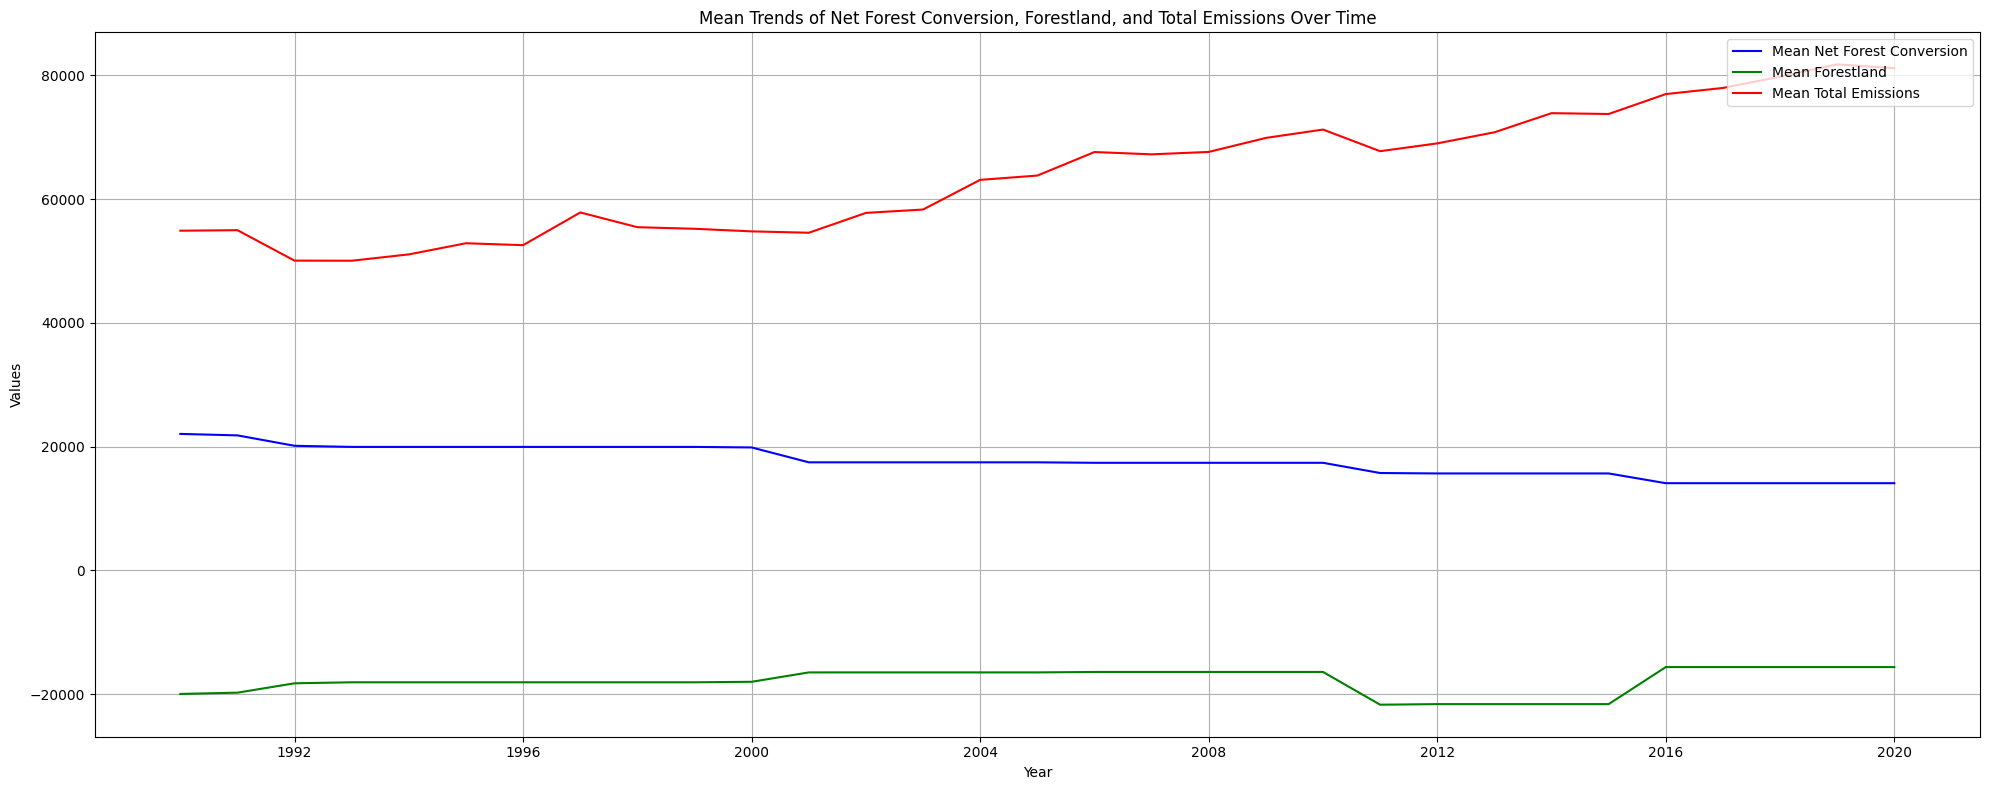

In [244]:
# Calculate mean values of net forest conversion, forestland, and total emissions by year
mean_net_forest_conversion = df_copy.groupby('year')['net_forest_conversion'].mean()
mean_forestland = df_copy.groupby('year')['forestland'].mean()
mean_total_emission = df_copy.groupby('year')['total_emission'].mean()

# Set the figure size
plt.figure(figsize=(20, 8))

# Plot the mean trend of net forest conversion over time
plt.plot(mean_net_forest_conversion.index, mean_net_forest_conversion.values, label='Mean Net Forest Conversion', color='blue')

# Plot the mean trend of forestland over time
plt.plot(mean_forestland.index, mean_forestland.values, label='Mean Forestland', color='green')

# Plot the mean trend of total emissions over time
plt.plot(mean_total_emission.index, mean_total_emission.values, label='Mean Total Emissions', color='red')

# Set labels for the primary y-axis
plt.ylabel('Values')

# Add legends
plt.legend(loc='upper right')

plt.title('Mean Trends of Net Forest Conversion, Forestland, and Total Emissions Over Time')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Net Forest Conversion (Blue Line): This line shows a relatively stable trend with a slight decrease over time, indicating a reduction in the rate of net forest conversion.
Mean Forestland (Red Line): This line remains fairly constant throughout the period, suggesting that the amount of forestland has not changed significantly.
Mean Total Emissions (Green Line): This line shows a gradual increase over time, indicating that total emissions have been rising.

The stability of the forestland metric suggests effective conservation efforts or a balance between deforestation and reforestation. This is a positive sign in terms of maintaining biodiversity and ecological balance.
The slight decrease in net forest conversion could be attributed to better forest management practices, stricter regulations, or increased awareness and technological advancements in agriculture that reduce the need for new agricultural land.
The increase in total emissions is concerning and highlights the need for more robust strategies to mitigate emission sources. This trend is particularly important to address in the context of global warming and climate change. Interestinglt, around 2012 to 2016, where forestland experiences a dip, total emissions has a sharp increase further highlighting the importance of forestland.

#### Average Temperature and Total Emissions

Studying the relationship between average temperature and total emissions helps assess the role of human activities, particularly greenhouse gas emissions, in driving changes in global temperatures. It provides empirical evidence of the link between anthropogenic emissions and the observed warming of the Earth's climate. Our goal is to investigate the effect of these emissions on the fluctuations of temperature over and throughout time.

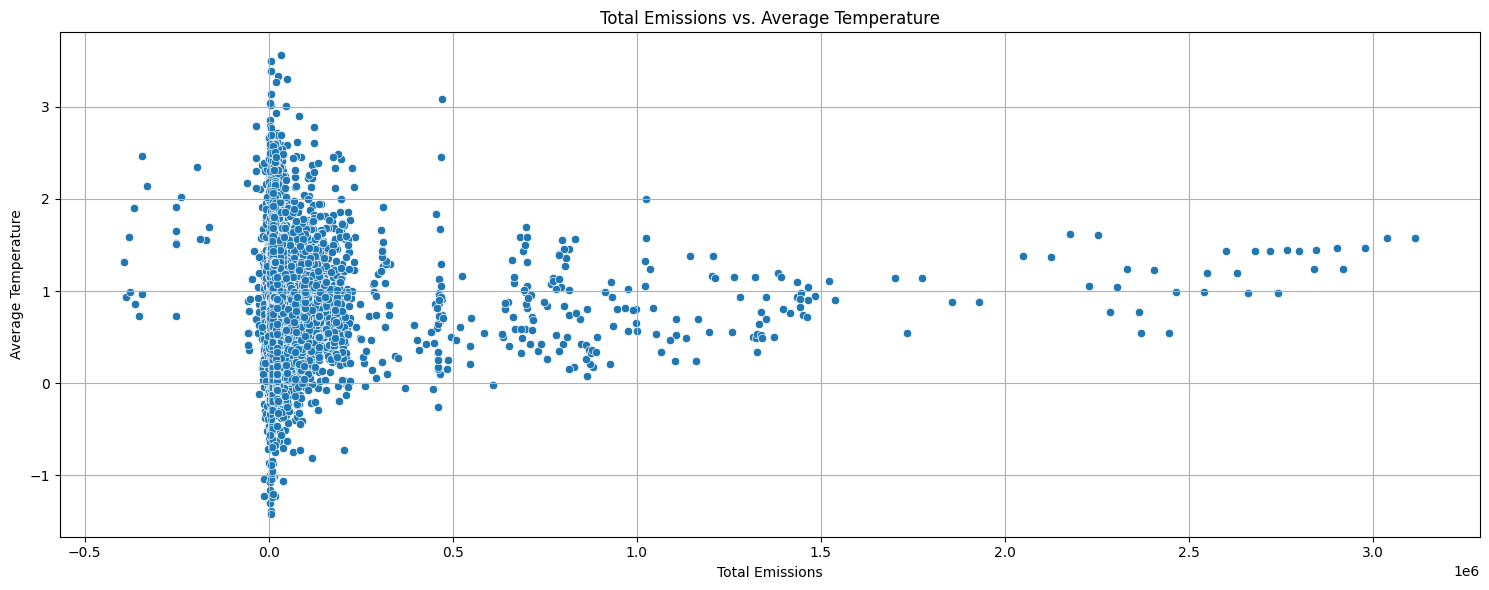

In [245]:
plt.figure(figsize=(15, 6))

# Create a scatter plot of total emissions against average temperature
sns.scatterplot(data=df_copy, x='total_emission', y='average_temperature')

plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Total Emissions')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

The data points are densely clustered around the lower range of emissions (near zero on the x-axis) and spread across a range of average temperatures from about -1 to 3 degrees Celsius. This suggests that most countries have relatively low emissions but vary widely in their average temperatures.
The temperature range does not significantly widen as emissions increase, which might suggest a weak or complex relationship between total emissions and average temperature.
The lack of a clear upward trend in temperature with increasing emissions could imply that direct correlation between a country's total emissions and its average temperature is not strong. This might be due to the influence of other climatic, geographical, or environmental factors.
The wide temperature variation at lower emission levels could be explored further to understand regional differences or the impact of other environmental policies.


Looking at the temporal analysis:

<Figure size 1500x600 with 0 Axes>

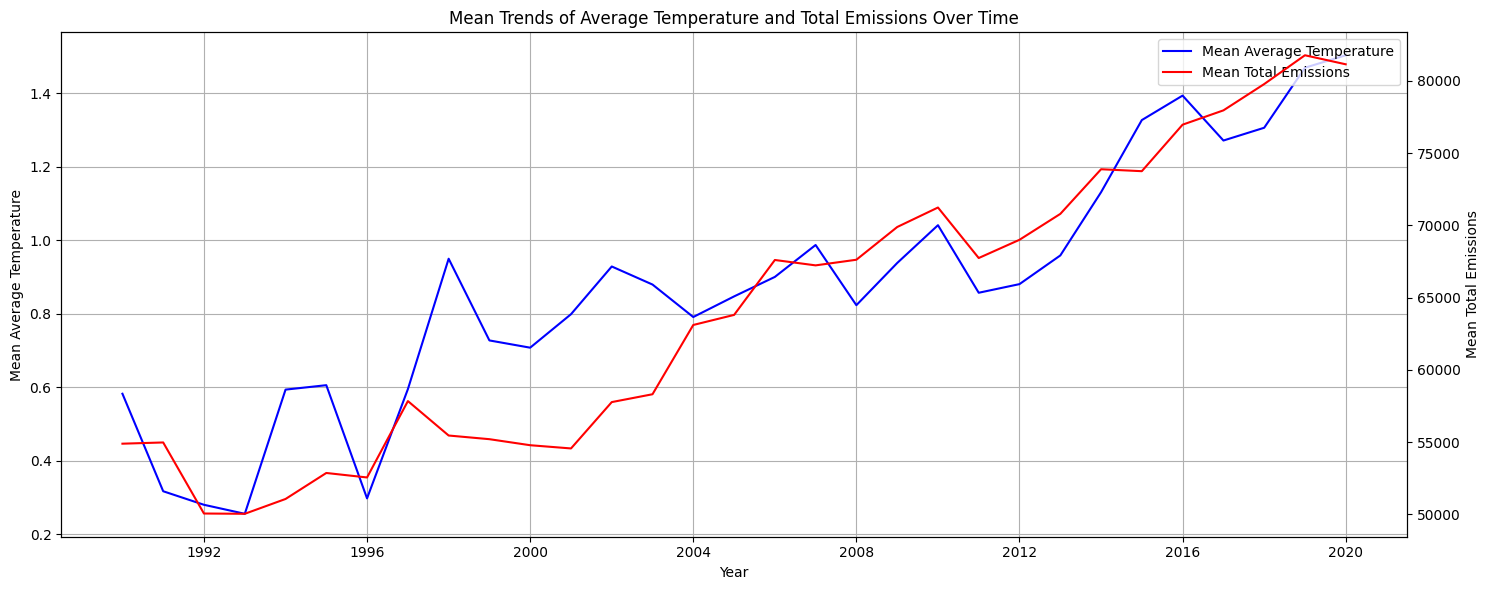

In [246]:
# Calculate the mean values of average temperature and total emissions by year
mean_average_temperature = df_copy.groupby('year')['average_temperature'].mean()
mean_total_emission = df_copy.groupby('year')['total_emission'].mean()

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the mean trend of average temperature over time
fig, ax1 = plt.subplots(figsize=(15, 6))
line1, = ax1.plot(mean_average_temperature.index, mean_average_temperature.values, label='Mean Average Temperature', color='blue')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the mean trend of total emissions over time on the secondary y-axis
line2, = ax2.plot(mean_total_emission.index, mean_total_emission.values, label='Mean Total Emissions', color='red')

# Combine legends into one (before setting axis labels)
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')  # You can adjust the location as needed

# Set labels for each y-axis
ax1.set_ylabel('Mean Average Temperature')
ax2.set_ylabel('Mean Total Emissions')

# Add a title and x-axis label
ax1.set_title('Mean Trends of Average Temperature and Total Emissions Over Time')
ax1.set_xlabel('Year')

# Add gridlines and adjust layout
ax1.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

This line graph plots the average global temperature and total CO2 emissions over the 30-year period from 1990 to 2020.
The red line represents the trend in total CO2 emissions, while the blue line shows the trend in average global temperature.
While both lines generally trend upwards, the correlation between them cannot be confirmed to be particularly strong.

Both CO2 emissions and average global temperatures have increased over the 30-year period. This overall upward trend aligns with the broader understanding of climate change, where increased greenhouse gas emissions contribute to global warming.
However, the lack of a strong direct correlation between total emissions and temperature suggests that other factors are also influencing global temperatures. These factors can include other greenhouse gases (such as methane and nitrous oxide), natural climate variability, oceanic cycles, and solar radiation changes.
Additionally, there may be a temporal lag between emissions and temperature changes due to the time it takes for the climate system to respond to increased greenhouse gases. This inertia means that current emissions will have long-term impacts on future temperatures.
Furthermore, natural events like volcanic eruptions, El Niño and La Niña events, and variations in solar activity can also cause significant fluctuations in global temperatures, adding complexity to the relationship between emissions and temperature.

#### A Geographic perspective

Examining data from 236 different countries allows us to identify regions that have made significant contributions to CO2 emissions. By analyzing emissions data from these diverse geographic areas, we can discern patterns and trends, pinpointing regions that have had a substantial impact on global carbon emissions. This analysis enables us to understand the distribution of emissions across different countries and identify areas where targeted interventions may be most effective in reducing emissions and mitigating climate change

Looking at highest emitters of CO2 in each year along with their total emissions for that year:

In [247]:
# Group data by year and find the country with the highest total emissions for each year
grouped_data = df_copy.groupby('year')
highest_emissions_by_year = grouped_data.apply(lambda x: x.loc[x['total_emission'].idxmax()])

# Create a DataFrame to store the results
result_table = highest_emissions_by_year[['year', 'area', 'total_emission']].reset_index(drop=True)

# Display the result
print(result_table)

         year       area  total_emission
0  1990-01-01     Brazil    1.316385e+06
1  1991-01-01     Brazil    1.323871e+06
2  1992-01-01     Brazil    1.326961e+06
3  1993-01-01     Brazil    1.327237e+06
4  1994-01-01     Brazil    1.331512e+06
5  1995-01-01     Brazil    1.337555e+06
6  1996-01-01     Brazil    1.336734e+06
7  1997-01-01  Indonesia    1.732859e+06
8  1998-01-01     Brazil    1.383603e+06
9  1999-01-01     Brazil    1.371965e+06
10 2000-01-01     Brazil    1.339927e+06
11 2001-01-01     Brazil    1.415655e+06
12 2002-01-01     Brazil    1.435239e+06
13 2003-01-01      China    1.538475e+06
14 2004-01-01      China    1.774609e+06
15 2005-01-01      China    1.929347e+06
16 2006-01-01      China    2.123838e+06
17 2007-01-01      China    2.252130e+06
18 2008-01-01      China    2.305208e+06
19 2009-01-01      China    2.405082e+06
20 2010-01-01      China    2.541904e+06
21 2011-01-01      China    2.364506e+06
22 2012-01-01      China    2.445016e+06
23 2013-01-01   

C:\Users\kamol\AppData\Local\Temp\ipykernel_1264\728963576.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_emissions_by_year = grouped_data.apply(lambda x: x.loc[x['total_emission'].idxmax()])


In the early years (1990s), Brazil demonstrates relatively high CO2 emissions compared to China. This could be attributed to factors such as industrial development, deforestation, and agricultural activities, which contribute significantly to carbon emissions in Brazil during that period.

China's Rising Emissions: From the late 1990s onwards, China's emissions begin to surpass those of Brazil and show a consistent upward trend. This escalation in emissions aligns with China's rapid economic growth, industrialization, and urbanization during this period, which led to increased energy consumption and carbon emissions from sectors such as manufacturing, transportation, and electricity generation.

The notable increase in CO2 emissions in Indonesia in 1997 can be attributed to several factors, with one of the most significant being the widespread forest fires that occurred during that year. The forest fires in Indonesia, particularly in the regions of Sumatra and Kalimantan, were exceptionally severe in 1997, primarily due to a combination of factors.

We also take a broader look at the top 5 countries for each year:

In [248]:
# Group data by year
grouped_data = df_copy.groupby('year')

# Define a function to get the top 5 highest emissions for each year
def top_5_emissions_per_year(group):
    return group.nlargest(5, 'total_emission')

# Apply the function to each group
top_5_emissions_by_year = grouped_data.apply(top_5_emissions_per_year)

# Reset index to remove hierarchical index
top_5_emissions_by_year = top_5_emissions_by_year.reset_index(drop=True)

# Display the result
print(top_5_emissions_by_year[['year', 'area', 'total_emission']])

          year                      area  total_emission
0   1990-01-01                    Brazil    1.316385e+06
1   1990-01-01                 Indonesia    8.644751e+05
2   1990-01-01                     China    8.031127e+05
3   1990-01-01           China, mainland    7.571223e+05
4   1990-01-01                      USSR    5.244739e+05
..         ...                       ...             ...
150 2020-01-01                     China    3.115114e+06
151 2020-01-01           China, mainland    3.039089e+06
152 2020-01-01  United States of America    1.023694e+06
153 2020-01-01                     India    9.754658e+05
154 2020-01-01                    Brazil    8.149279e+05

[155 rows x 3 columns]


C:\Users\kamol\AppData\Local\Temp\ipykernel_1264\1154435592.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_emissions_by_year = grouped_data.apply(top_5_emissions_per_year)


Each country's emissions trajectory is influenced by a range of factors, including economic development, energy infrastructure, industrial activities, policy interventions, and demographic trends. Understanding these country-specific factors is essential for formulating tailored strategies to mitigate emissions and promote sustainable development.

The dataset includes emissions data from major global economies such as China, the United States, India, and Brazil, reflecting their significant contributions to global carbon emissions. Addressing emissions from these countries is crucial for achieving international climate goals and combating climate change effectively. These contributions are highlighted in the above output where we see the top 5 countries somewhat stay consistent throughout. The data provides valuable insights into the dynamics of CO2 emissions across different countries over time, highlighting regional disparities, shifts in emissions leadership, and the global significance of addressing emissions from major economies.

Looking at everything from a cumulative perspective:

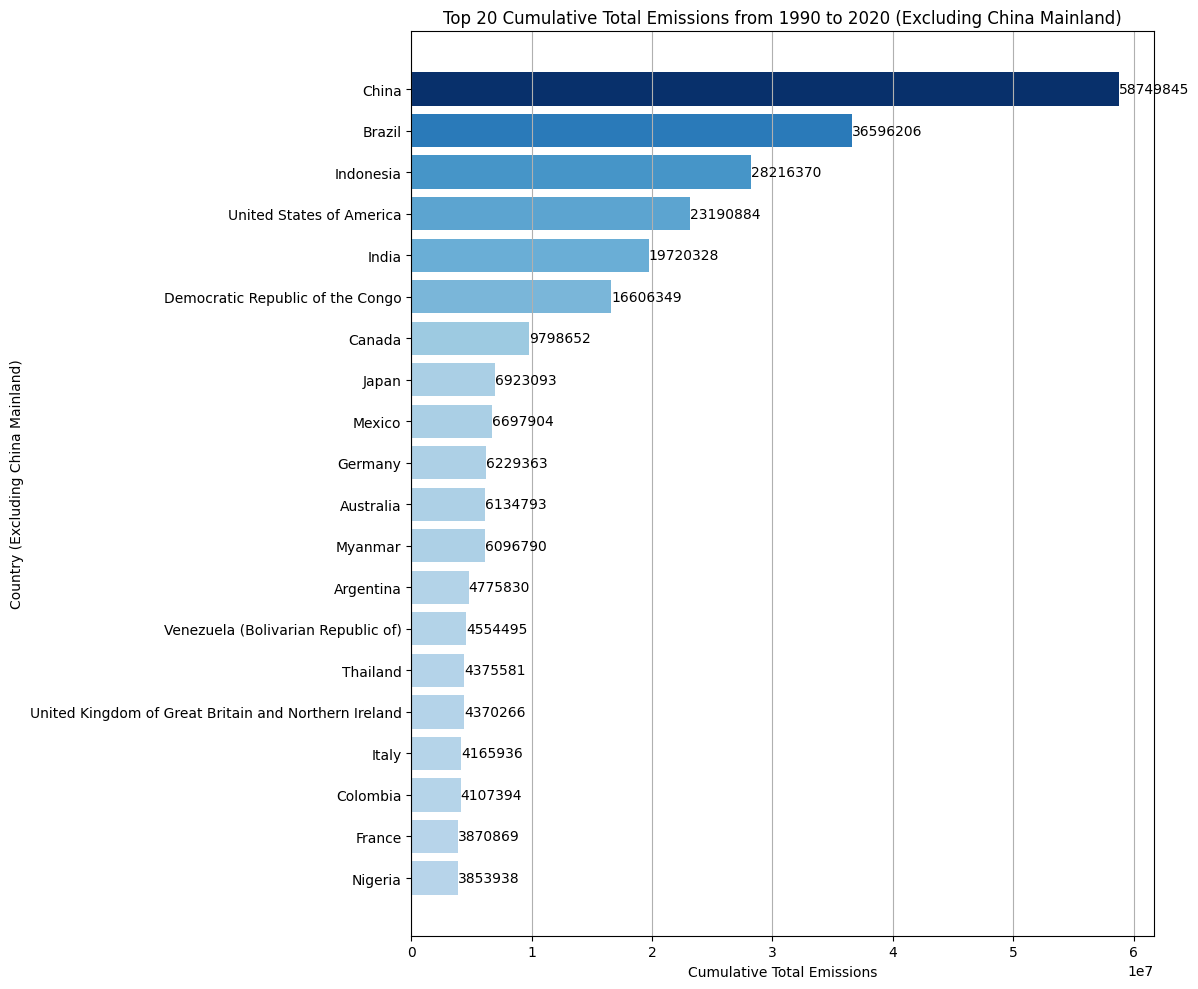

In [249]:
# Group by country and sum emissions (excluding China Mainland)
country_emissions = df_copy[df_copy['area'] != 'China, mainland'].groupby('area')['total_emission'].sum()

# Sort countries based on their cumulative emissions and select top 20
top_countries = country_emissions.sort_values(ascending=False).head(20)

# Reverse the order to show the highest at the top
top_countries = top_countries[::-1]

# Normalize the cumulative emissions to create a gradient
norm = plt.Normalize(top_countries.min(), top_countries.max())

# Use a subset of the Blues colormap to avoid very light colors
cmap = plt.cm.Blues
colors = cmap(norm(top_countries) * 0.7 + 0.3)  # Adjust the range to make colors darker

# Plotting
plt.figure(figsize=(12, 10))

# Plot horizontal bar chart with gradient colors
bars = plt.barh(top_countries.index, top_countries, color=colors)

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             '{:.0f}'.format(bar.get_width()),  # Rounded to zero decimal places
             ha='left', va='center')

plt.xlabel('Cumulative Total Emissions')
plt.ylabel('Country (Excluding China Mainland)')  
plt.title('Top 20 Cumulative Total Emissions from 1990 to 2020 (Excluding China Mainland)')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

This chart ranks countries by their total CO2 emissions (cumulative) from 1990 to 2020.
Notably, the top 5 countries contribute almost 25% of the total emissions from the past 30 years with China contributing 13 % alone.
The visual helps identify the key players in global emissions which is essential for directing policy and technological interventions.The top countries, including China, Brazil, Indonesia, the United States, and India, contribute disproportionately to global emissions.
These countries' high emissions correlate with their economic size, industrial activities, and energy consumption patterns.
It further communicates the urgency for targeted international collaboration and the need to focus our efforts on these high-emission countries in order to achieve significant reductions in global CO2 levels.

A temporal analysis of the Top 5 CO2 emitters from 1990 to 2020:

C:\Users\kamol\AppData\Local\Temp\ipykernel_1264\2700895477.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_emissions_by_year = df_copy_filtered_mainland.groupby('year').apply(lambda x: x.nlargest(5, 'total_emission', keep='all'))


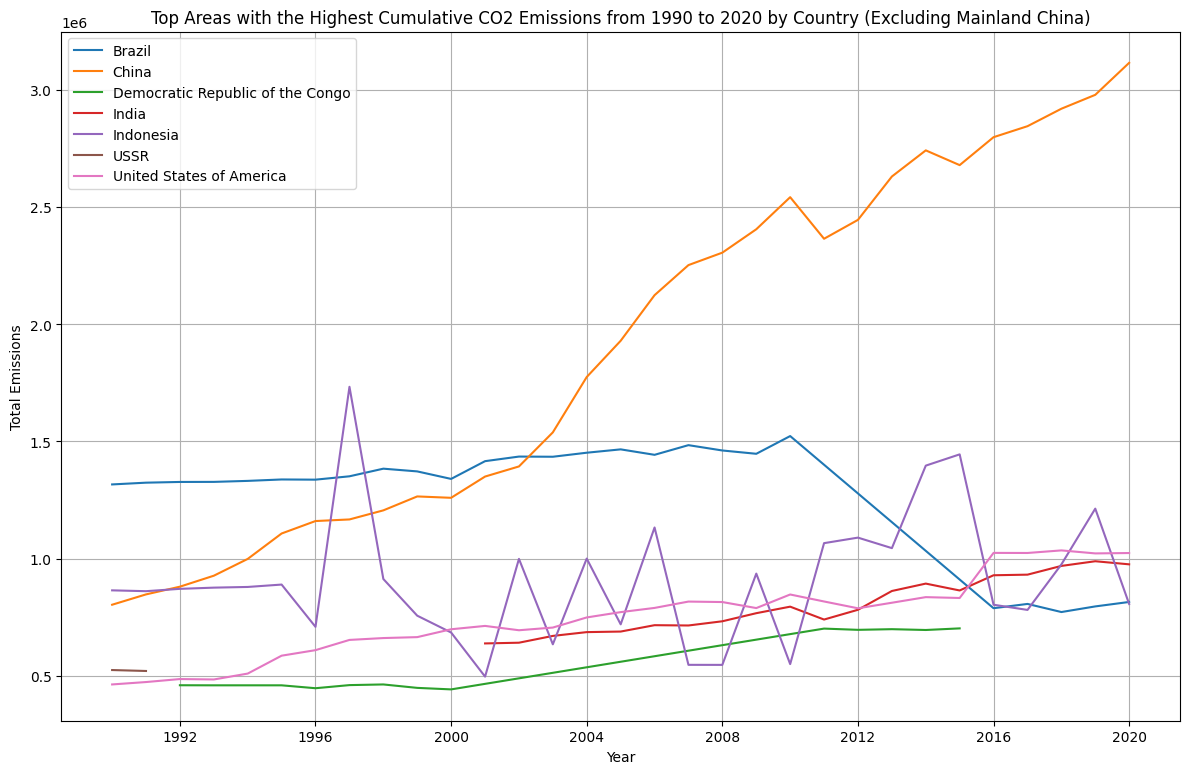

In [250]:
# Filter out rows corresponding to mainland China
df_copy_filtered_mainland = df_copy[df_copy['area'] != 'China, mainland']

# Group data by year and get the top 5 highest emissions for each year, excluding mainland China
top_5_emissions_by_year = df_copy_filtered_mainland.groupby('year').apply(lambda x: x.nlargest(5, 'total_emission', keep='all'))

# Reset index to remove hierarchical index
top_5_emissions_by_year = top_5_emissions_by_year.reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each country and plot its emissions over the years
for country, data in top_5_emissions_by_year.groupby('area'):
    plt.plot(data['year'], data['total_emission'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Top Areas with the Highest Cumulative CO2 Emissions from 1990 to 2020 by Country (Excluding Mainland China)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This slide shows the emission trends for the top-emitting countries over time, highlighting changes in their contributions.

Different countries show varying emission patterns. Some have continuous increases, like China while others show stabilization or decline, like Brazil.
Understanding these trends could possibly provide insight into the effectiveness of existing policies and where further efforts are required. That is to say, countries with declining or stabilizing emissions may have implemented effective policies and technologies to reduce their carbon footprint. An example of this would be Brazil who around 2010 implemented several measures to decrease CO2 emissions from the agri-food industry. One significant step was the enforcement of stricter regulations on deforestation, particularly in the Amazon rainforest, which was a major source of greenhouse gas emissions due to land clearing for agriculture.

A correlation matrix showing all the variables in a dataset provides valuable insights into the relationships between different variables.

It helps identify the strength and direction of relationships between pairs of variables. Positive correlations indicate that as one variable increases, the other variable tends to increase as well, while negative correlations indicate an inverse relationship.
By examining correlations, we can understand how variables depend on each other. For example, in our dataset containing CO2 emissions, variables such as population, economic indicators, energy consumption, and land use may be correlated with emissions. Understanding these dependencies is essential for analyzing causal relationships and making informed decisions.
Furthermore, correlation analysis can provide insights for policy and decision making. For instance, identifying strong correlations between emissions and specific economic indicators or land use practices can inform policies aimed at reducing emissions or promoting sustainable development.

Below we look at the correlation matrix for all our numerical varibales in our dataset: 

In [251]:
df_copy.corr(numeric_only=True)

savanna_fires  forest_fires  crop_residues  \
savanna_fires                         1.000000      0.506980       0.026144   
forest_fires                          0.506980      1.000000       0.075395   
crop_residues                         0.026144      0.075395       1.000000   
rice_cultivation                     -0.030408      0.070959       0.823230   
drained_organic_soils                 0.016872      0.107911       0.207347   
pesticides_manufacturing              0.060787      0.052928       0.870496   
food_transport                        0.070317      0.071026       0.759600   
forestland                           -0.058308     -0.150526      -0.733392   
net_forest_conversion                 0.225827      0.419284       0.119636   
food_household_consumption            0.002366      0.019465       0.849463   
food_retail                           0.015486      0.028507       0.827729   
on_farm_electricity_use              -0.008393      0.052236       0.834867   
food_packaging                        0.017426      0.011095       0.808743   
agrifood_systems_waste_disposal       0.025231      0.114180       0.903266   
food_processing                      -0.000819      0.008458       0.854097   
fertilizers_manufacturing            -0.022988      0.010724       0.831844   
ippu                                 -0.008521      0.015668       0.833453   
manure_applied_to_soils               0.014782      0.080093       0.942712   
manure_left_on_pasture                0.255156      0.185568       0.770664   
manure_management                     0.026626      0.064656       0.964675   
fires_in_organic_soils               -0.004603      0.126869       0.044756   
fires_in_humid_tropical_forests       0.448276      0.941704       0.013190   
on_farm_energy_use                    0.021887      0.049890       0.867688   
rural_population                      0.000406      0.077860       0.832869   
urban_population                      0.021620      0.084817       0.932881   
total_population_male                 0.008363      0.082469       0.905488   
total_population_female               0.010888      0.086352       0.910942   
total_emission                        0.128669      0.238671       0.828031   
average_temperature                  -0.046508     -0.037813       0.017827   

                                 rice_cultivation  drained_organic_soils  \
savanna_fires                           -0.030408               0.016872   
forest_fires                             0.070959               0.107911   
crop_residues                            0.823230               0.207347   
rice_cultivation                         1.000000               0.236545   
drained_organic_soils                    0.236545               1.000000   
pesticides_manufacturing                 0.596904               0.161667   
food_transport                           0.433016               0.307628   
forestland                              -0.505939              -0.329537   
net_forest_conversion                    0.063755               0.215765   
food_household_consumption               0.698316               0.146760   
food_retail                              0.553270               0.185032   
on_farm_electricity_use                  0.830996               0.056580   
food_packaging                           0.712605               0.073821   
agrifood_systems_waste_disposal          0.906667               0.244534   
food_processing                          0.704365               0.112942   
fertilizers_manufacturing                0.755617               0.103802   
ippu                                     0.673371               0.113924   
manure_applied_to_soils                  0.804309               0.216540   
manure_left_on_pasture                   0.628801               0.102060   
manure_management                        0.802396               0.215514   
fires_in_organic_soils                   0.182468               0.

To visualise it better we can look at this in the form of a heatmap shown below:

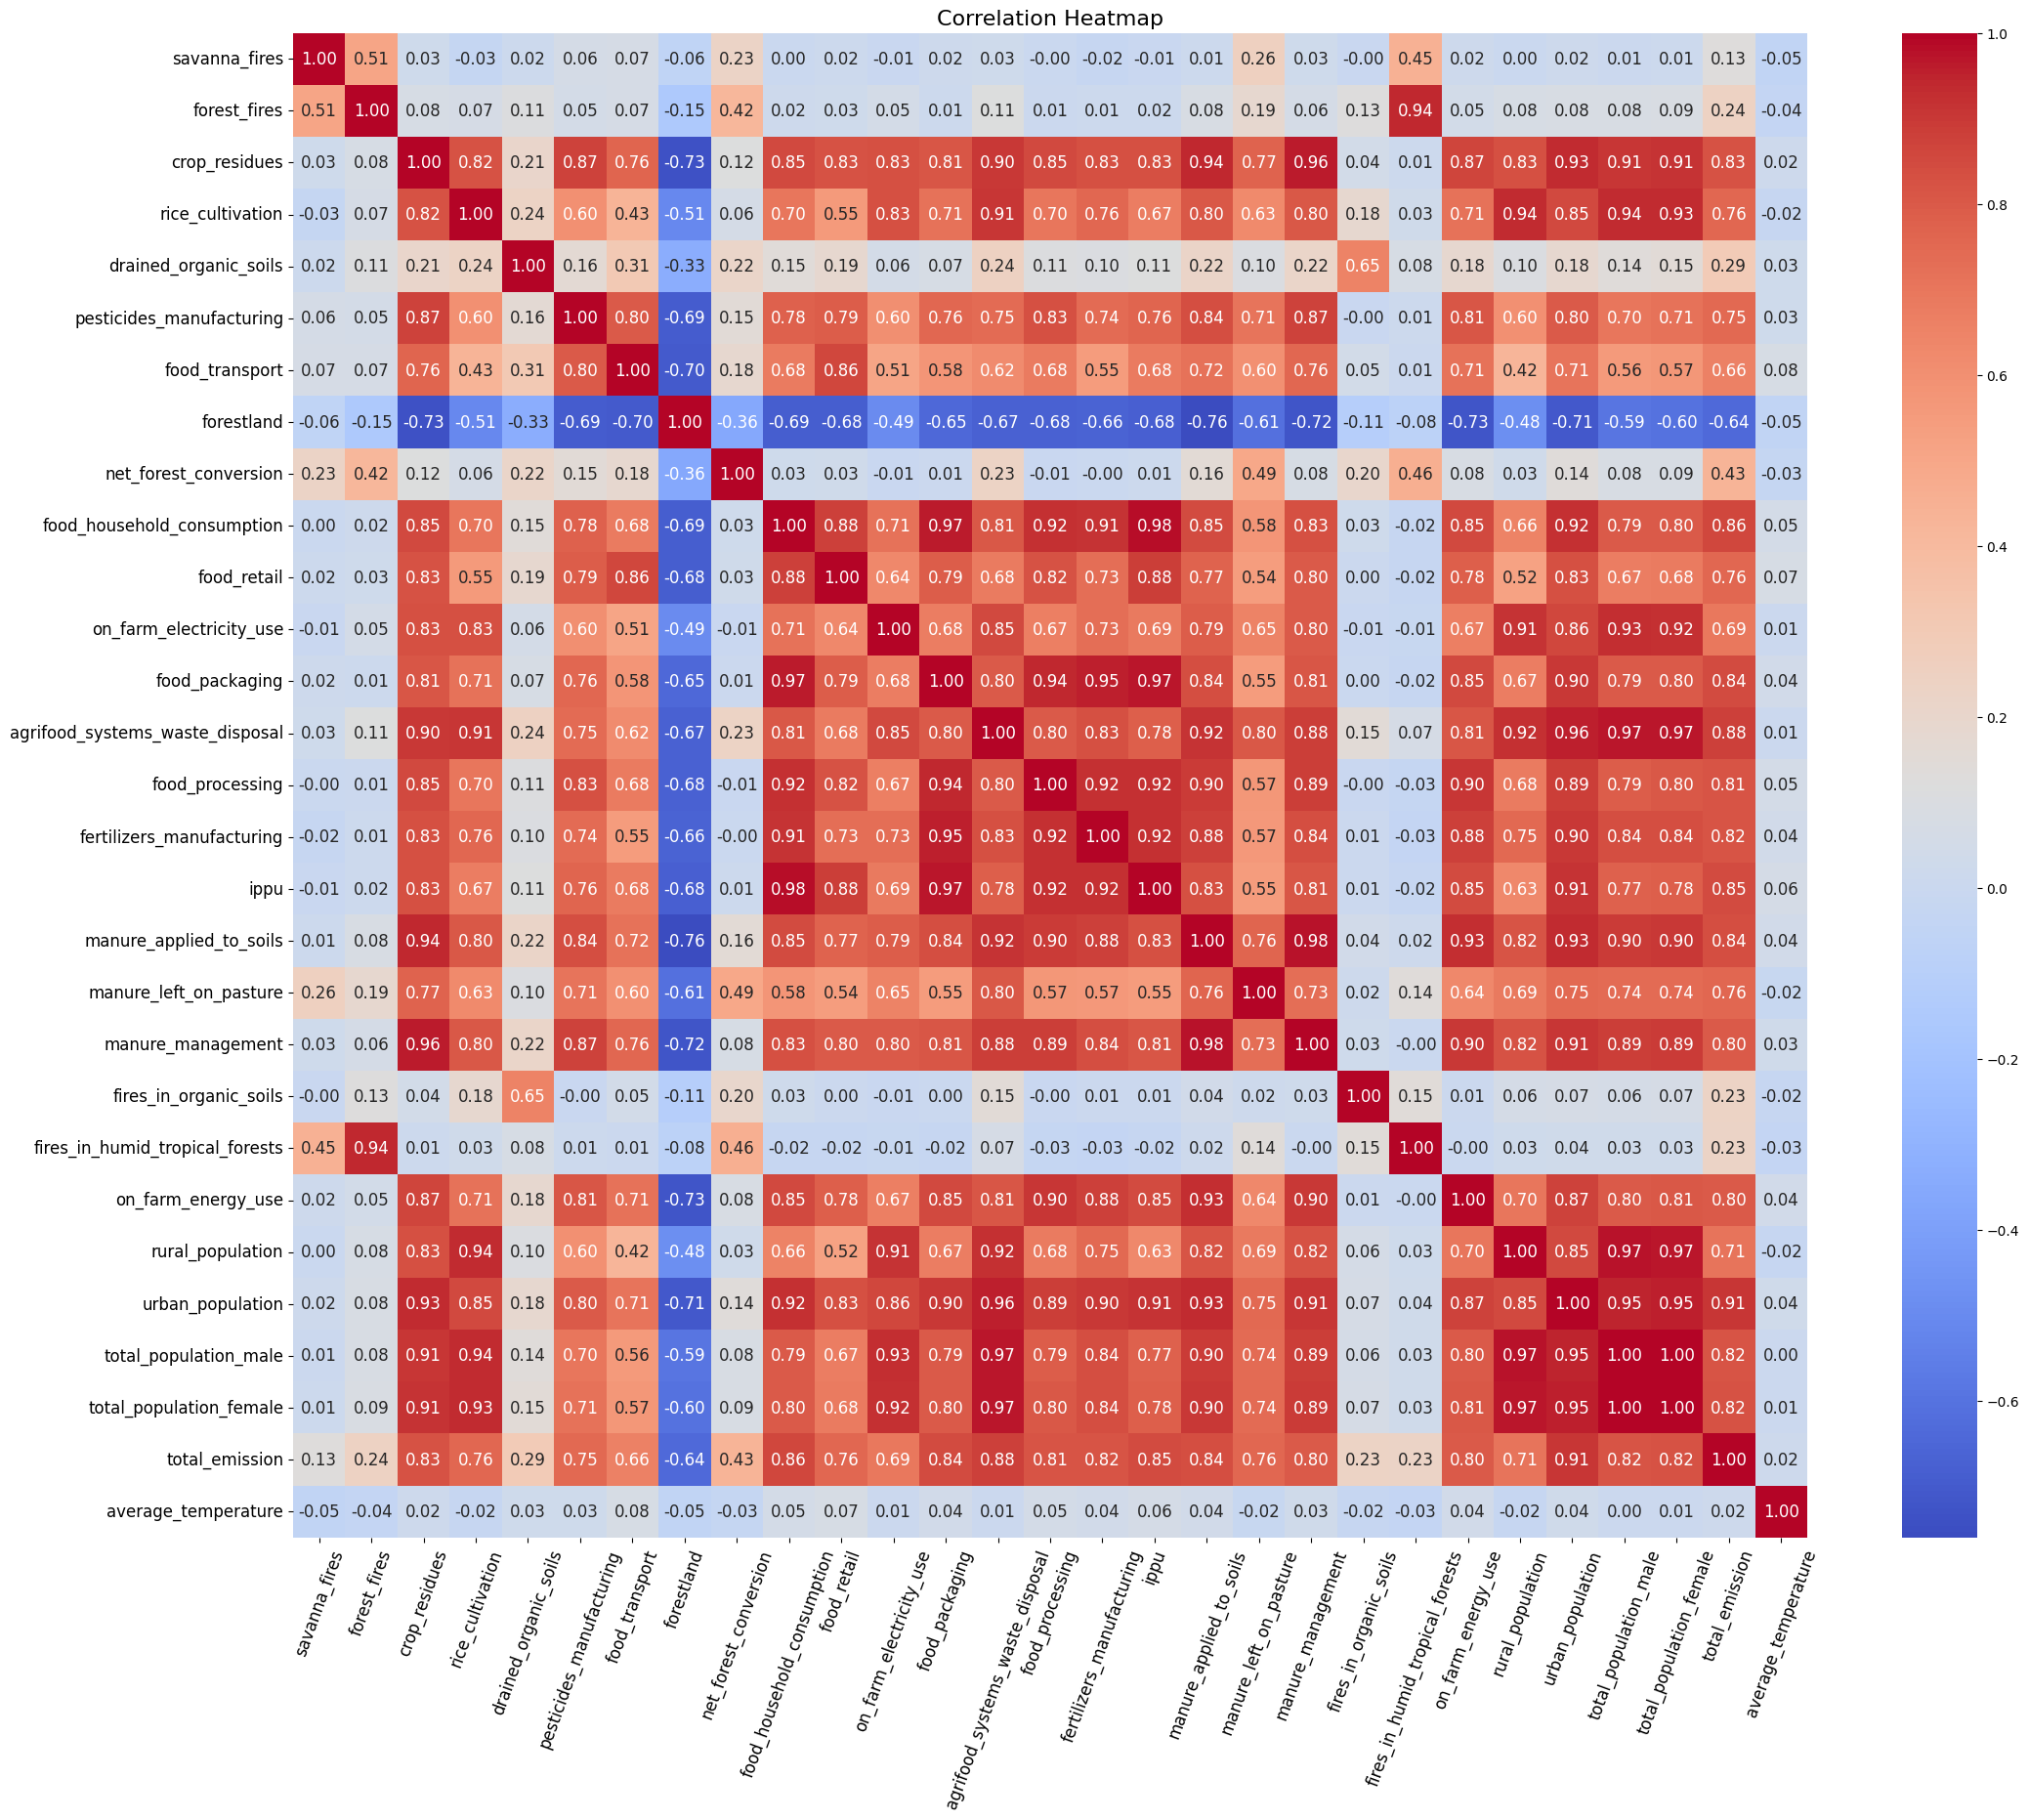

In [252]:
# Calculate the correlation matrix
corr = numerical_columns_copy.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))  # Adjust the size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize":12}) # Change the fontsize as needed
plt.title('Correlation Heatmap', fontsize=16) # Adjust title font size
plt.xticks(rotation=70, fontsize=12)  # Rotate x-axis labels by 70 degrees and adjust font size
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.show()

The above heatmap shows the interrelationships between various factors in the dataset.

Identifies which variables are most strongly correlated with CO2 emissions and temperature changes which would be helpful in guiding focused research and policy-making on influential factors. Looking at the intense red and blue parts highlight which variables are highly correlated. Focusing specifically on total emissions, at first glance we see that population factors are highly correlated as well as ippu, household consumption, manure applied to soils and crop residues amongst others. 
Interestingly, while we might expect a strong correlation between CO2 emissions and temperature, the data shows otherwise.
The matrix reveals that while some variables have high correlations with total emissions, the direct correlation with temperature is relatively weak.
This further suggests that a broader set of factors, including other greenhouse gases and natural climate variability plays significant roles in influencing temperature.

Looking at specifically at the variables and total emission in terms of correlation in descending order:

In [253]:
sorted_correlation_coefficients = df_copy.corr(numeric_only=True)['total_emission'].sort_values(ascending=False)
print(sorted_correlation_coefficients)

total_emission                     1.000000
urban_population                   0.907774
agrifood_systems_waste_disposal    0.879840
food_household_consumption         0.860020
ippu                               0.848324
food_packaging                     0.842555
manure_applied_to_soils            0.841109
crop_residues                      0.828031
total_population_female            0.823163
total_population_male              0.818163
fertilizers_manufacturing          0.816064
food_processing                    0.814844
manure_management                  0.800147
on_farm_energy_use                 0.795028
rice_cultivation                   0.756638
food_retail                        0.755753
manure_left_on_pasture             0.755672
pesticides_manufacturing           0.746777
rural_population                   0.705162
on_farm_electricity_use            0.692060
food_transport                     0.657877
net_forest_conversion              0.429578
drained_organic_soils           

Urbanisation and Industrialisation: The strong positive correlations between total emissions and variables such as urban population, agrifood systems waste disposal, and industrial processes (IPPU) reflect the significant impact of urbanisation and industrialisation on CO2 emissions. As countries urbanise and industrialise, there's typically an increase in energy consumption, transportation emissions, waste generation, and industrial activities, all contributing to higher CO2 emissions. 

Variables related to agricultural practices, such as food household consumption, crop residues, fertilizers manufacturing, and manure applied to soils, exhibit positive correlations with emissions. This suggests that agricultural activities, including crop cultivation, livestock farming, and fertilizer use, contribute to CO2 emissions through processes such as methane release from livestock and nitrous oxide emissions from fertilizer application.

The positive correlations between total emissions and total population (both male and female) indicate that population growth may influence emission levels. A growing population leads to increased energy demand, resource consumption, waste generation, and land use change, all of which contribute to higher emissions.
And of course, as mentioned above forestland shows a negative correlation with total emissions suggesting that higher levels of forest cover are associated with lower emission levels.

Since currently our focus is specifically on emissions here and not on the underlying population dynamics, we remove the total male and female populations.
Thereafter, looking at the descriptive statistics for just the highly correlated variables:

In [254]:
# Select columns with correlations above or equal to 0.8 with 'total_emission'
high_corr_columns = sorted_correlation_coefficients[sorted_correlation_coefficients >= 0.8].index
# Exclude total population columns from the list of highly correlated columns
high_corr_columns = high_corr_columns.drop(['total_population_female', 'total_population_male'])

# Exclude 'total_emission' itself if it's included
high_corr_columns = high_corr_columns.drop('total_emission', errors='ignore')

# Select numerical columns of specific types from your dataset
numerical_columns = df_copy[high_corr_columns]

# Describe the selected columns
description = numerical_columns.describe()

# Display the description
print(description)

       urban_population  agrifood_systems_waste_disposal  \
count      6.965000e+03                      6965.000000   
mean       1.693230e+07                      6018.444633   
std        6.574362e+07                     22156.742542   
min        0.000000e+00                         0.340000   
25%        2.173860e+05                        86.680500   
50%        2.357581e+06                       901.275700   
75%        8.277123e+06                      3006.442100   
max        9.020778e+08                    213289.701600   

       food_household_consumption          ippu  food_packaging  \
count                 6965.000000  6.965000e+03     6965.000000   
mean                  4847.580384  1.999150e+04     1658.629808   
std                  24897.935876  1.053094e+05    11481.343725   
min                      0.000000  0.000000e+00        0.000000   
25%                     13.797400  5.193070e+01       67.631366   
50%                    223.149000  1.338400e+03       74.

Pair plots provide a visual representation of the relationships between pairs of highly correlated variables. This visual inspection allows for a qualitative assessment of the nature and strength of the relationship, including whether it is linear, non-linear, or monotonic.

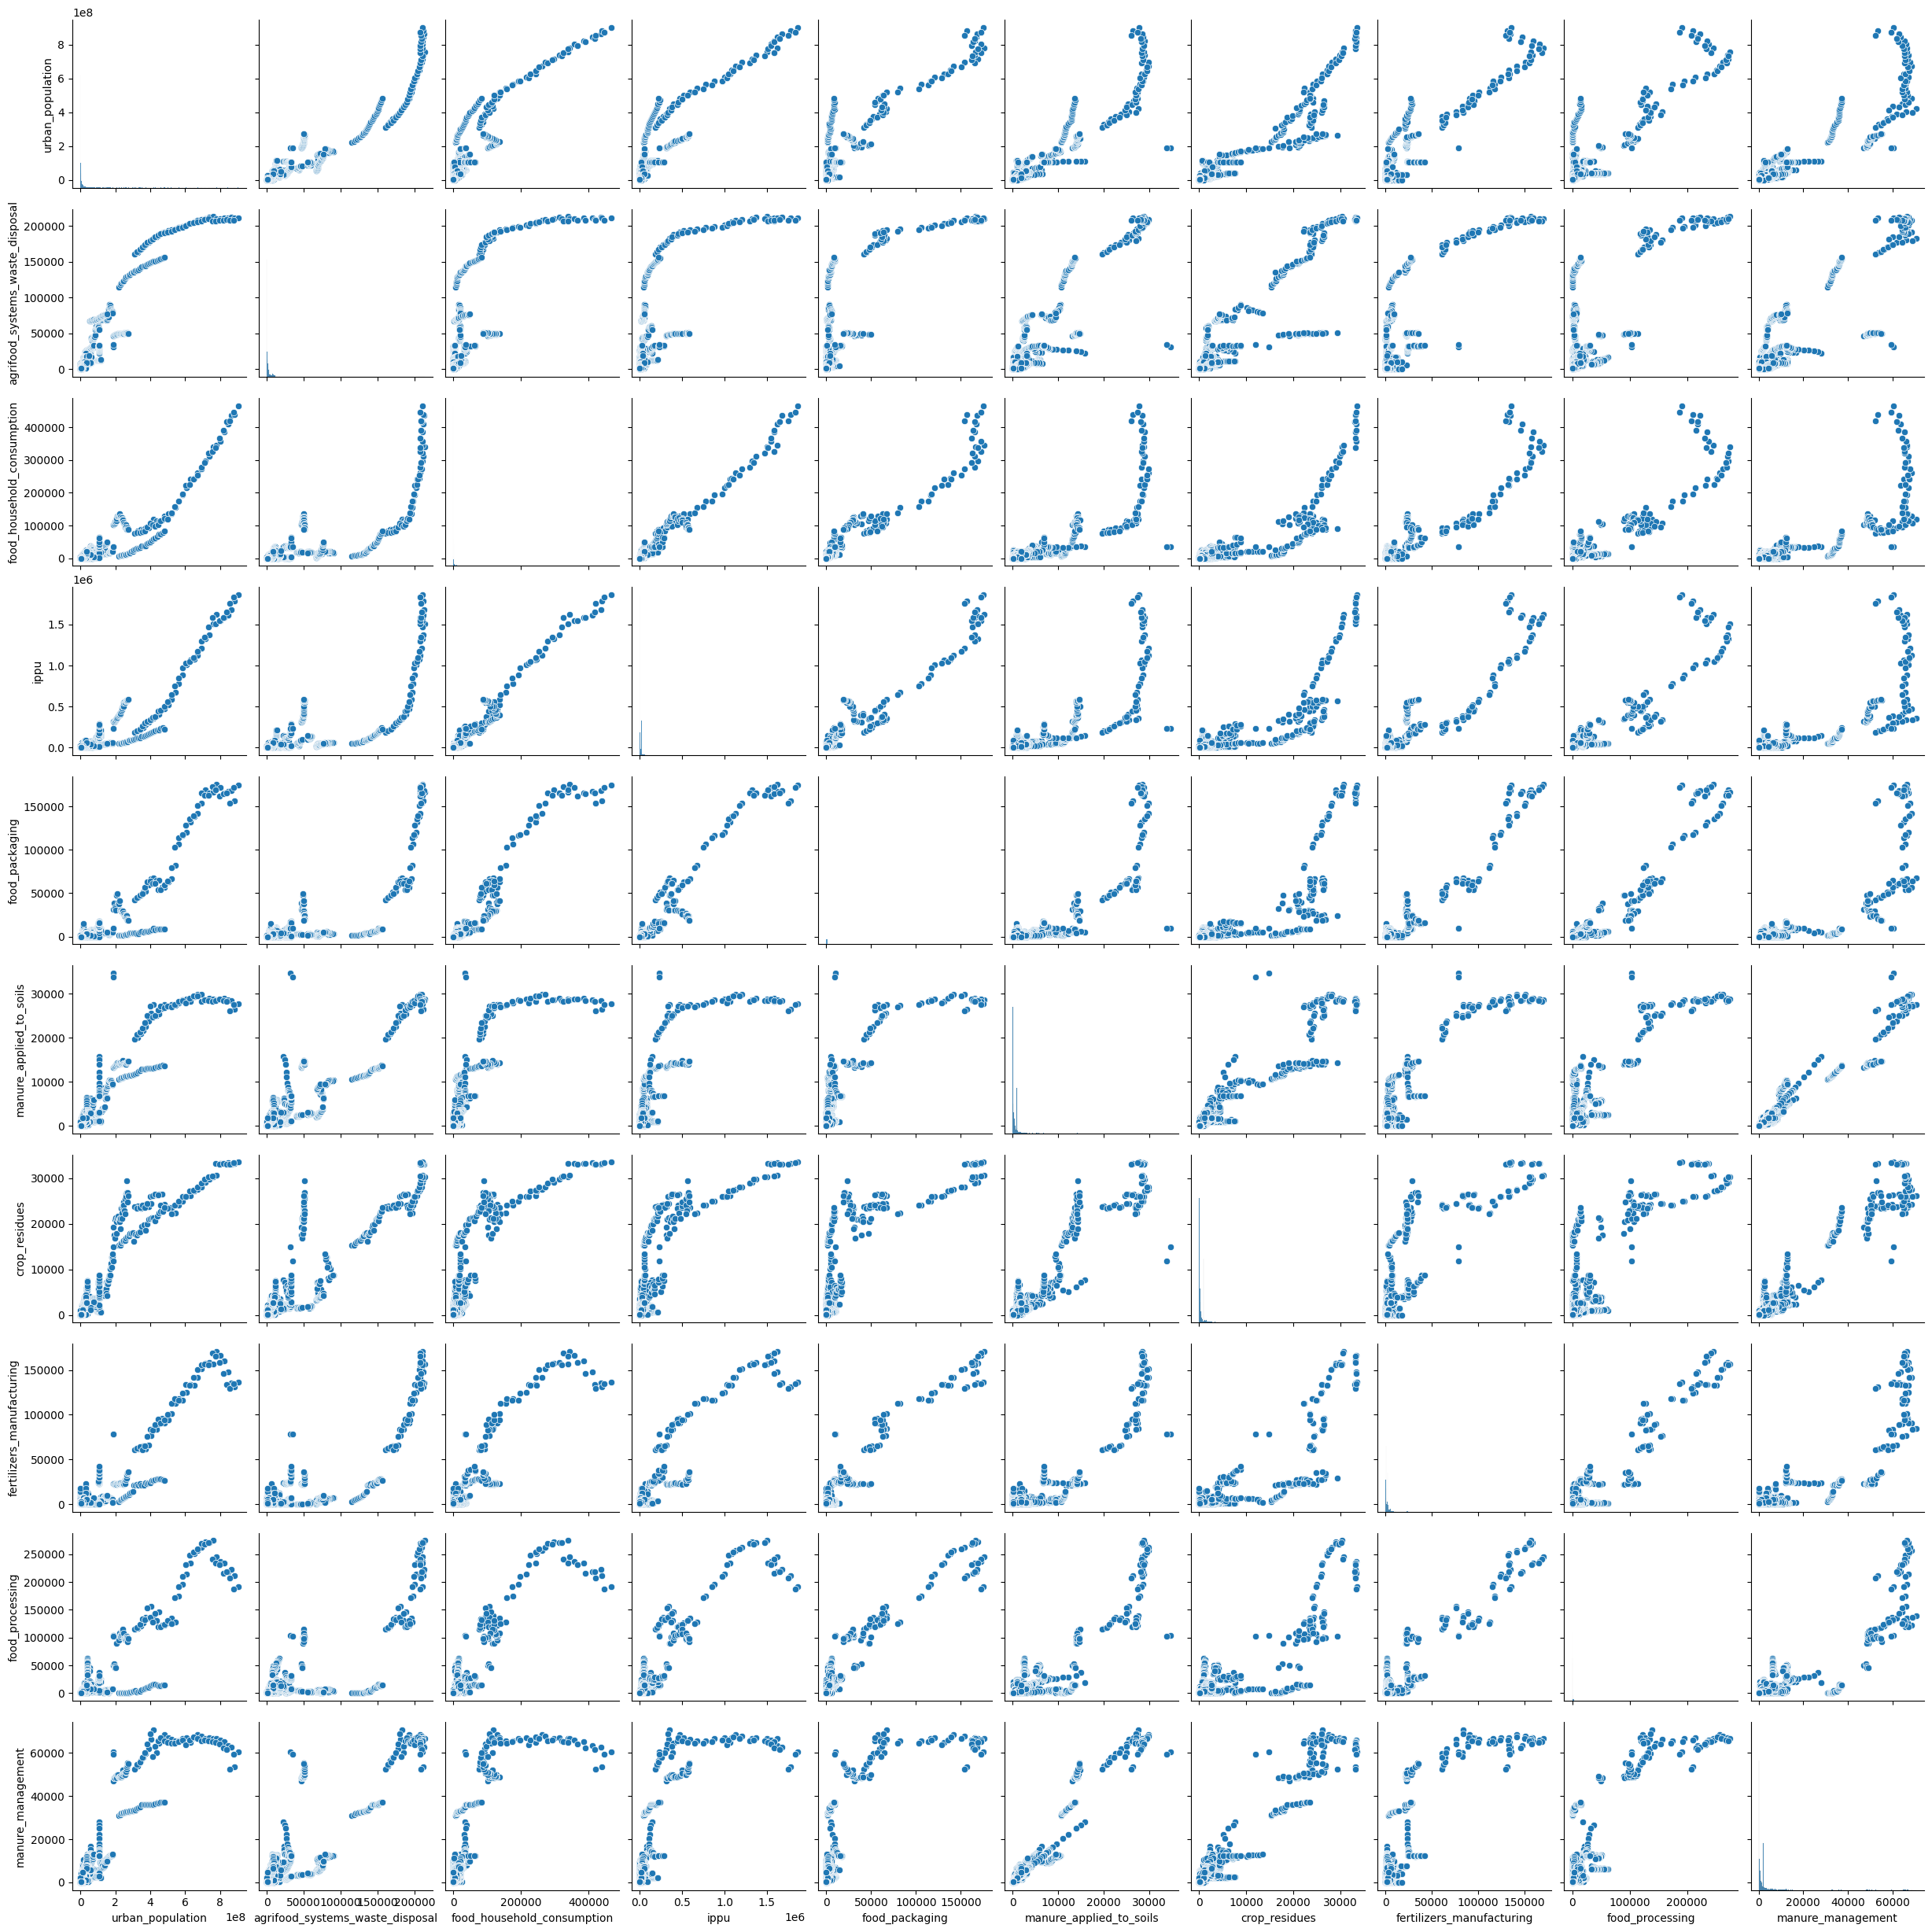

In [255]:
# Select the subset of highly correlated variables
selected_df_copy = df_copy[high_corr_columns]

# Create the pair plot
sns.pairplot(selected_df_copy)
plt.show()

Many plots show clear trends, either increasing or decreasing, which suggests strong temporal relationships between the variables. For instance, plots along the diagonal from top left to bottom right often show a clear upward or downward trajectory, indicating trends over time.
Several plots display outliers, or data points that deviate significantly from the overall pattern. These could indicate anomalies in the data or specific years/countries with unusual values.
The plots vary in the tightness of their data point clustering. Some show a very tight linear relationship, suggesting a strong correlation between the variables. Others are more dispersed, indicating weaker relationships.

Plots comparing different types of emissions (e.g., agri-food activities CO2 emissions vs. total emissions) generally show a positive correlation, as expected, since overall emissions include those from agriculture. The slope of these plots can give insights into how significant agri-food activities are in the total emissions profile of a country.


Printing out a list of our hughly correlaating variables:

In [256]:
print(high_corr_columns)

Index(['urban_population', 'agrifood_systems_waste_disposal',
       'food_household_consumption', 'ippu', 'food_packaging',
       'manure_applied_to_soils', 'crop_residues', 'fertilizers_manufacturing',
       'food_processing', 'manure_management'],
      dtype='object')


Looking at the high correlating variables, and their trends from 1990-2020 in the form of a heatmap:

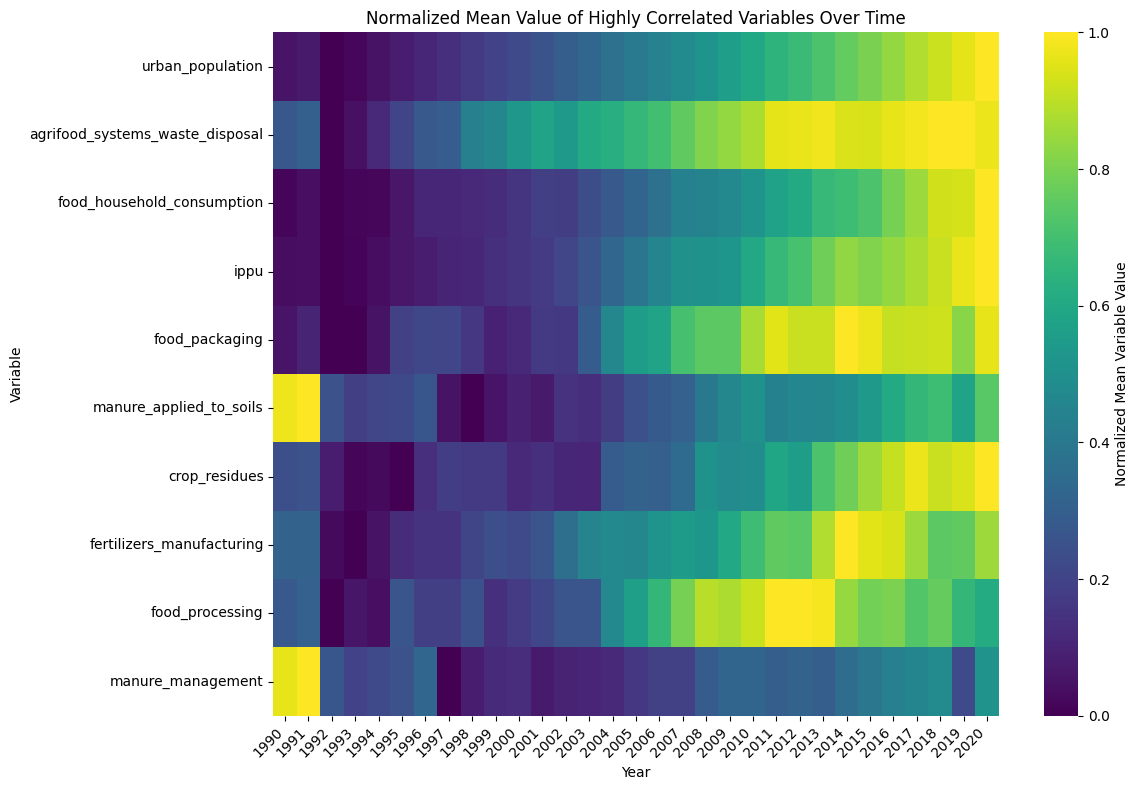

In [257]:
# Select the subset of highly correlated numerical columns along with the 'year' column
high_corr_columns_with_year = ['year'] + list(high_corr_columns)
selected_df = df_copy[high_corr_columns_with_year]

# Group the data by 'year' and calculate the mean for each year
mean_df = selected_df.groupby('year').mean()

# Normalize the data
normalized_df = (mean_df - mean_df.min()) / (mean_df.max() - mean_df.min())

# Create the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(normalized_df.T, cmap='viridis', cbar_kws={'label': 'Normalized Mean Variable Value'})

# Set the title and labels
plt.title('Normalized Mean Value of Highly Correlated Variables Over Time')
plt.xlabel('Year')
plt.ylabel('Variable')

# Format the x-tick labels to show only the year
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([label.get_text()[:4] for label in ax.get_xticklabels()])

plt.tight_layout()
plt.show()

This heatmap focuses on variables with a correlation greater than 0.8 with total CO2 emissions, showing their changes over the 30-year period.

Key Variables: Variables like IPPU emissions, waste disposal, and household consumption show consistently high normalized values, indicating significant contributions to total emissions over time.
Temporal Patterns: The heatmap reveals periods of significant changes in these variables, linked to policy changes, economic activities, or technological advancements. This offers insights into the effectiveness of emission reduction policies during those times.
It's worth noting that manure management and manure applied to soils has seemingly decreased this could be due to global efforts in manure management strategies which were implemented globally from 1990 to 2020 to help decrease CO2 emissions. For example, in the United States and Canada, there has been a growing emphasis on anaerobic digestion systems for large-scale livestock operations. These systems capture methane emissions from manure and convert them into biogas, which can be used for electricity generation or as a renewable natural gas. This in turn, also decreases the effect of other greenhouse gases, one of them being CO2.

Looking at the trends for each of these variables against total emissions:

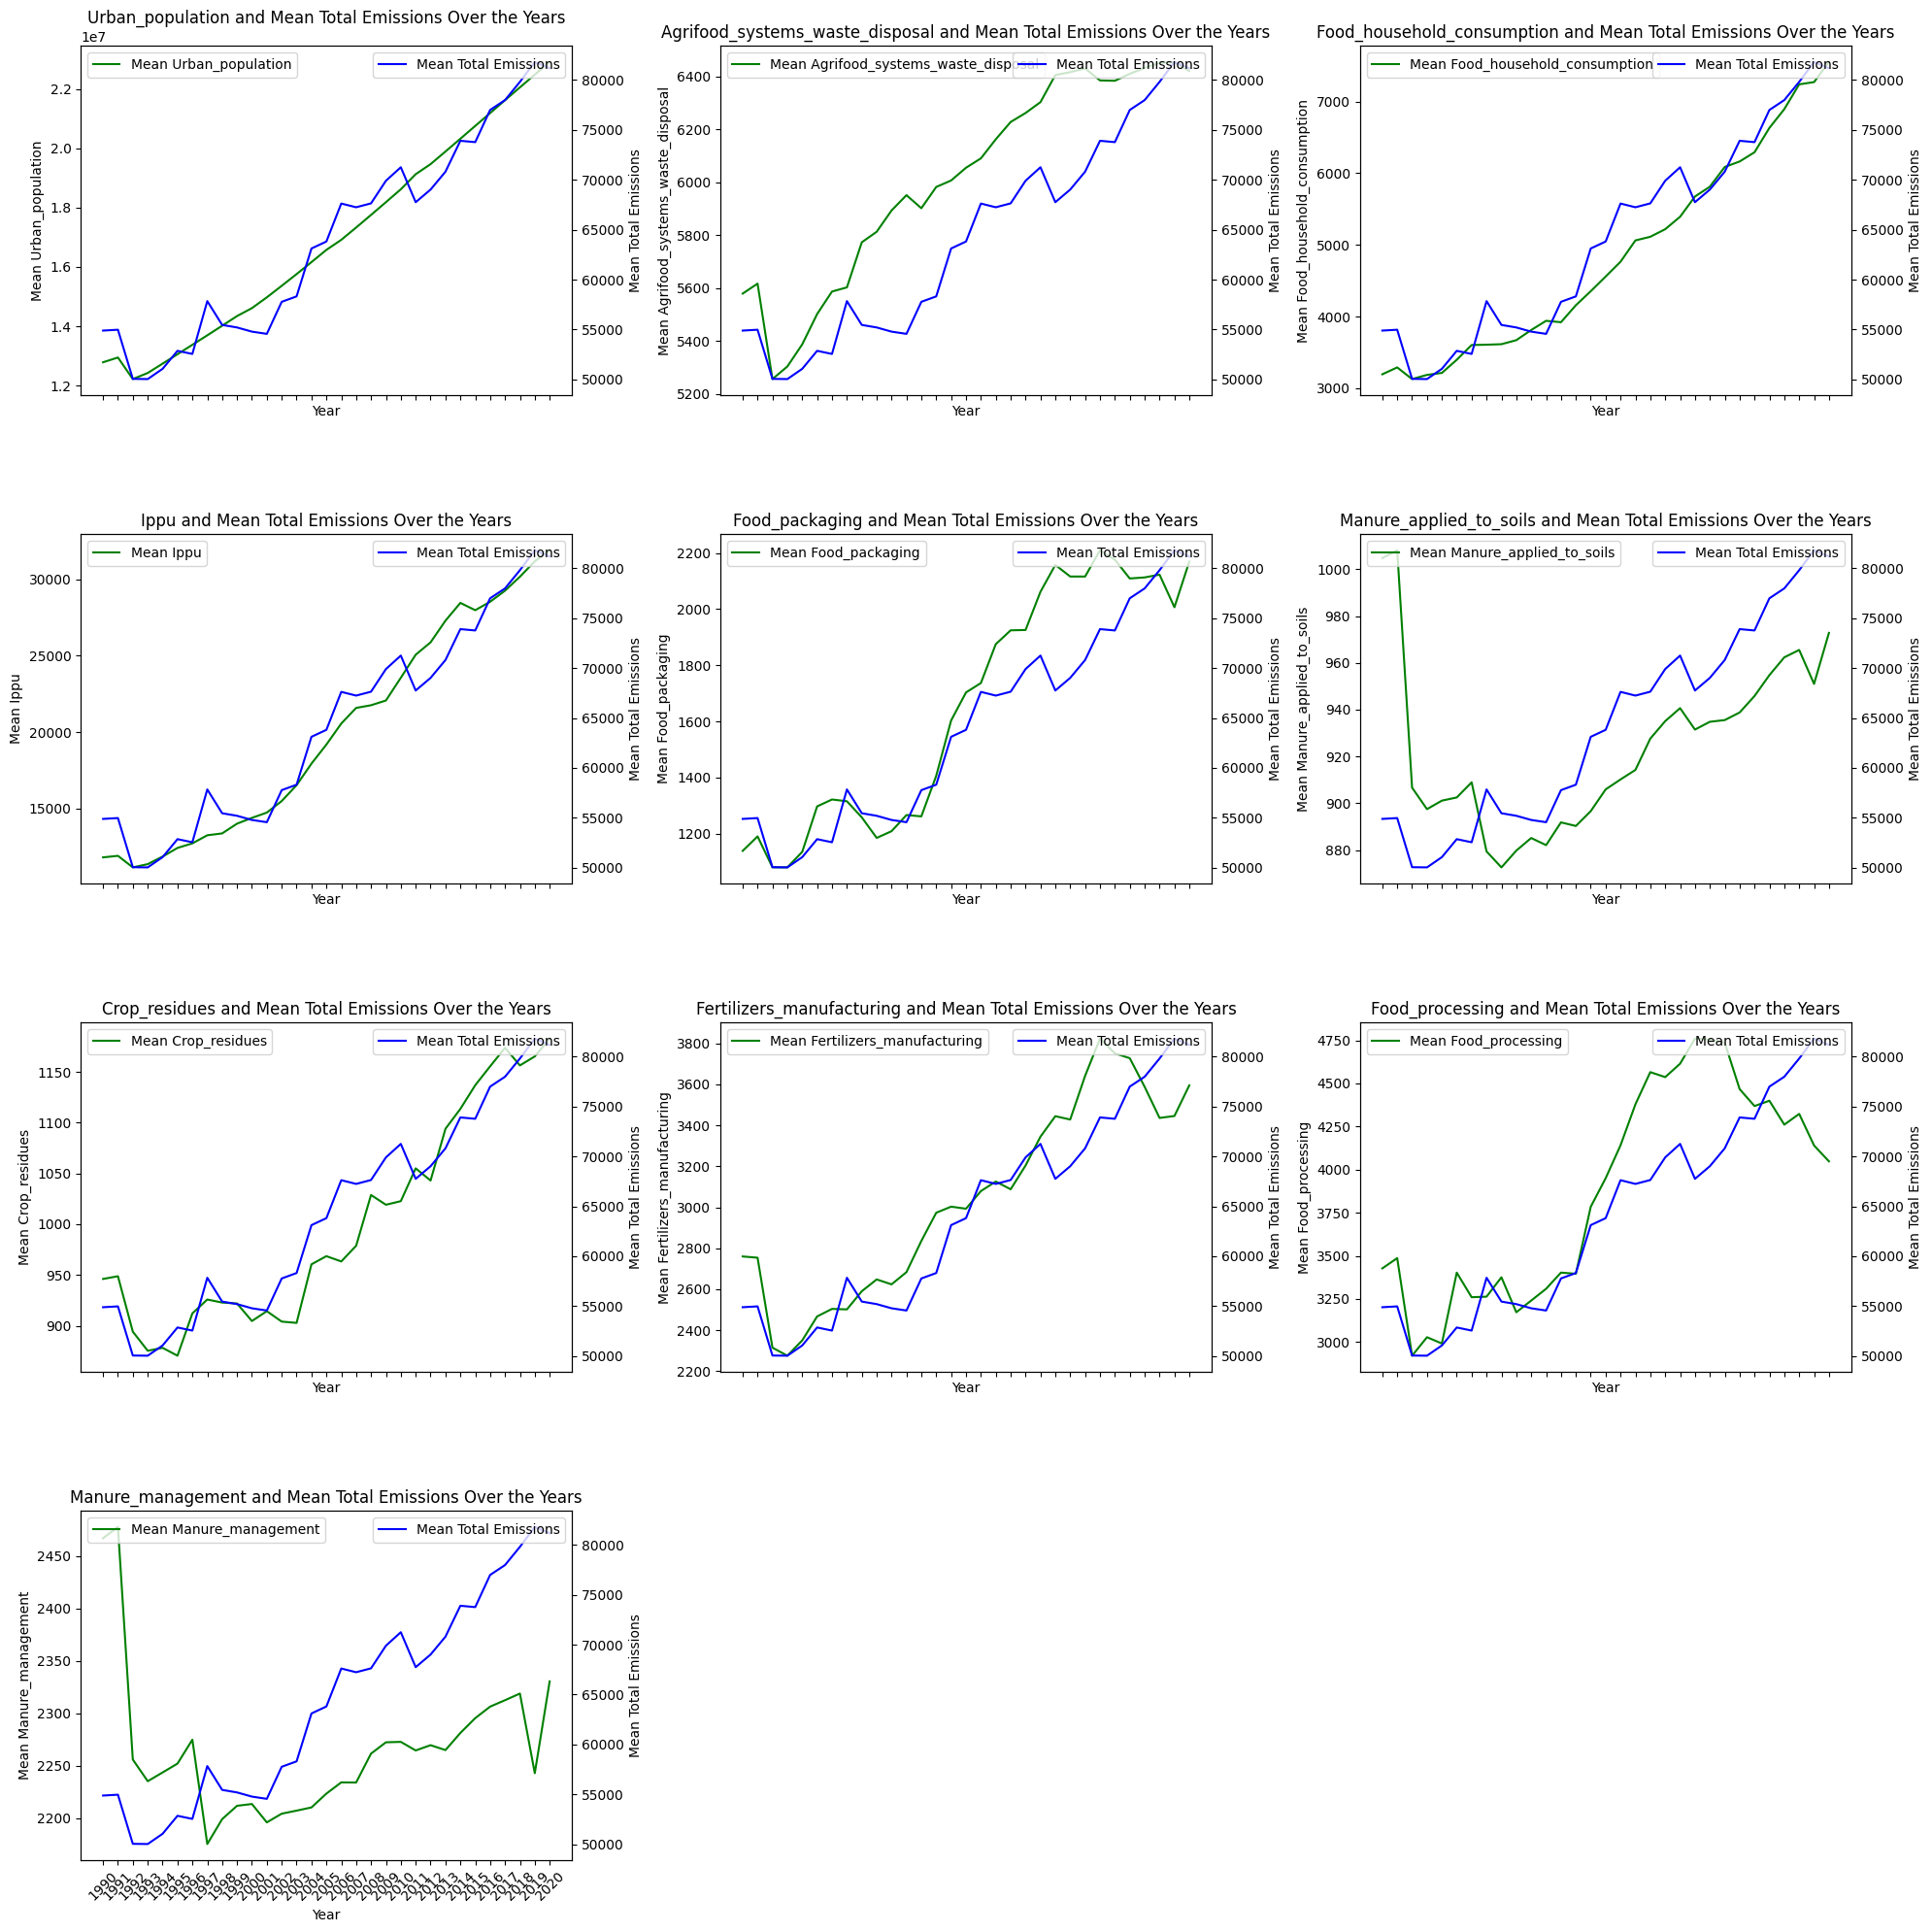

In [258]:
# Group data by year and calculate the mean total emissions for each year
mean_emissions_by_year = df_copy.groupby(df_copy['year'])['total_emission'].mean()

# Select highly correlated columns excluding 'total_emission'
high_corr_columns = ['urban_population', 'agrifood_systems_waste_disposal',
                     'food_household_consumption', 'ippu', 'food_packaging',
                     'manure_applied_to_soils', 'crop_residues', 'fertilizers_manufacturing',
                     'food_processing', 'manure_management']

# Create a grid of line graphs for each highly correlated column along with mean total emissions
num_plots = len(high_corr_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharex=True)

# Plot each highly correlated variable along with mean total emissions
for i, column in enumerate(high_corr_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    mean_column_by_year = df_copy.groupby(df_copy['year'])[column].mean()
    ax.plot(mean_column_by_year.index, mean_column_by_year.values, label=f'Mean {column.capitalize()}', color='green')
    ax.set_ylabel(f'Mean {column.capitalize()}')
    ax.legend(loc='upper left')

    # Add mean total emissions to the same subplot
    ax2 = ax.twinx()
    ax2.plot(mean_emissions_by_year.index, mean_emissions_by_year.values, label='Mean Total Emissions', color='blue')
    ax2.set_ylabel('Mean Total Emissions')
    ax2.legend(loc='upper right')

    # Set title for each subplot
    ax.set_title(f'{column.capitalize()} and Mean Total Emissions Over the Years')

    # Set x-axis labels for each subplot
    ax.set_xlabel('Year')
    ax.set_xticks(mean_column_by_year.index)
    ax.set_xticklabels(mean_column_by_year.index.year, rotation=45)  # Show only the year

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the height space between plots

plt.show()

Urban Population and Mean Total Emissions Over the Years:
Observation: Both the urban population and mean total emissions show a steady increase over the years.
Insight: The correlation suggests that urbanization might be contributing to the rise in emissions, possibly due to increased energy consumption and waste generation in urban areas.
Recommendation: Investigate urban planning and development policies that incorporate sustainability measures to mitigate emission increases.

Agrifood Systems, Waste Disposal, and Mean Total Emissions Over the Years:
Observation: Similar to urban population, waste disposal from agrifood systems and total emissions both trend upwards.
Insight: The increase in waste disposal could be a significant contributor to the overall emissions, highlighting inefficiencies in waste management within the agrifood sector.
Recommendation: Enhance waste management strategies in the agrifood sector, possibly through improved recycling and reduction programs.

Food, Household Consumption, and Mean Total Emissions Over the Years:
Observation: Both household consumption and total emissions have increased.
Insight: This suggests that domestic consumption patterns are linked to emissions, potentially through increased use of non-renewable energy sources and consumer goods.
Recommendation: Promote sustainable consumption practices and the use of energy-efficient appliances.

IPPU and Mean Total Emissions Over the Years:
Observation: Emissions from Industrial Processes and Product Use (IPPU) and total emissions follow a similar upward trend.
Insight: IPPU activities are a major source of emissions, likely due to reliance on fossil fuels and inefficient technologies.
Recommendation: Focus on technological upgrades and the adoption of cleaner production techniques in the industrial sector.

Food Packaging and Mean Total Emissions Over the Years:
Observation: Increases in emissions from food packaging activities correlate with overall emission trends.
Insight: The packaging sector contributes significantly to emissions, possibly due to the use of non-recyclable materials and energy-intensive production processes.
Recommendation: Encourage the development and use of sustainable packaging solutions.

Manure Applied to Soils and Mean Total Emissions Over the Years:
Observation: A notable divergence occurs around 2010 where emissions from manure application decrease while total emissions continue to rise.
Insight: This suggests improvements in manure management practices, potentially reducing its impact on total emissions.
Recommendation: Continue to improve and innovate in agricultural practices to further reduce emissions.

Crop Residues and Mean Total Emissions Over the Years:
Observation: Emissions from crop residues show a steady increase, aligning with the overall emissions trend.
Insight: Residue burning or improper disposal might be contributing to higher emissions.
Recommendation: Implement sustainable agricultural residue management practices, such as no-burn policies and residue recycling.

Fertilizers Manufacturing and Mean Total Emissions Over the Years:
Observation: Both metrics show a consistent increase, indicating a strong link between fertilizer production and emissions.
Insight: The manufacturing of fertilizers is highly energy-intensive and a significant emission source.
Recommendation: Advocate for the use of environmentally friendly fertilizers and improved manufacturing processes.

Food Processing and Mean Total Emissions Over the Years:
Observation: Trends in food processing emissions closely follow the overall emissions curve.
Insight: Food processing is a notable contributor to emissions, likely due to energy use and waste generation.
Recommendation: Enhance efficiency in food processing through better energy management and waste reduction techniques.

Manure Management and Mean Total Emissions Over the Years:
Observation: There is a sharp decrease in emissions from manure management after 2010, diverging from the trend in total emissions.
Insight: Significant improvements in manure management techniques might have contributed to this reduction.
Recommendation: Further promote and invest in innovative manure management technologies to sustain and enhance this positive trend.

Overall, the graphs collectively illustrate the significant impact of various agri-food activities on CO2 emissions. The consistent upward trend in most activities alongside total emissions underscores the need for integrated and sustainable approaches across all sectors to mitigate climate change. The divergences observed in manure-related activities suggest that targeted interventions can lead to substantial emission reductions, providing a model for other sectors.

Looking at these same variables and the trensds against average temperature:

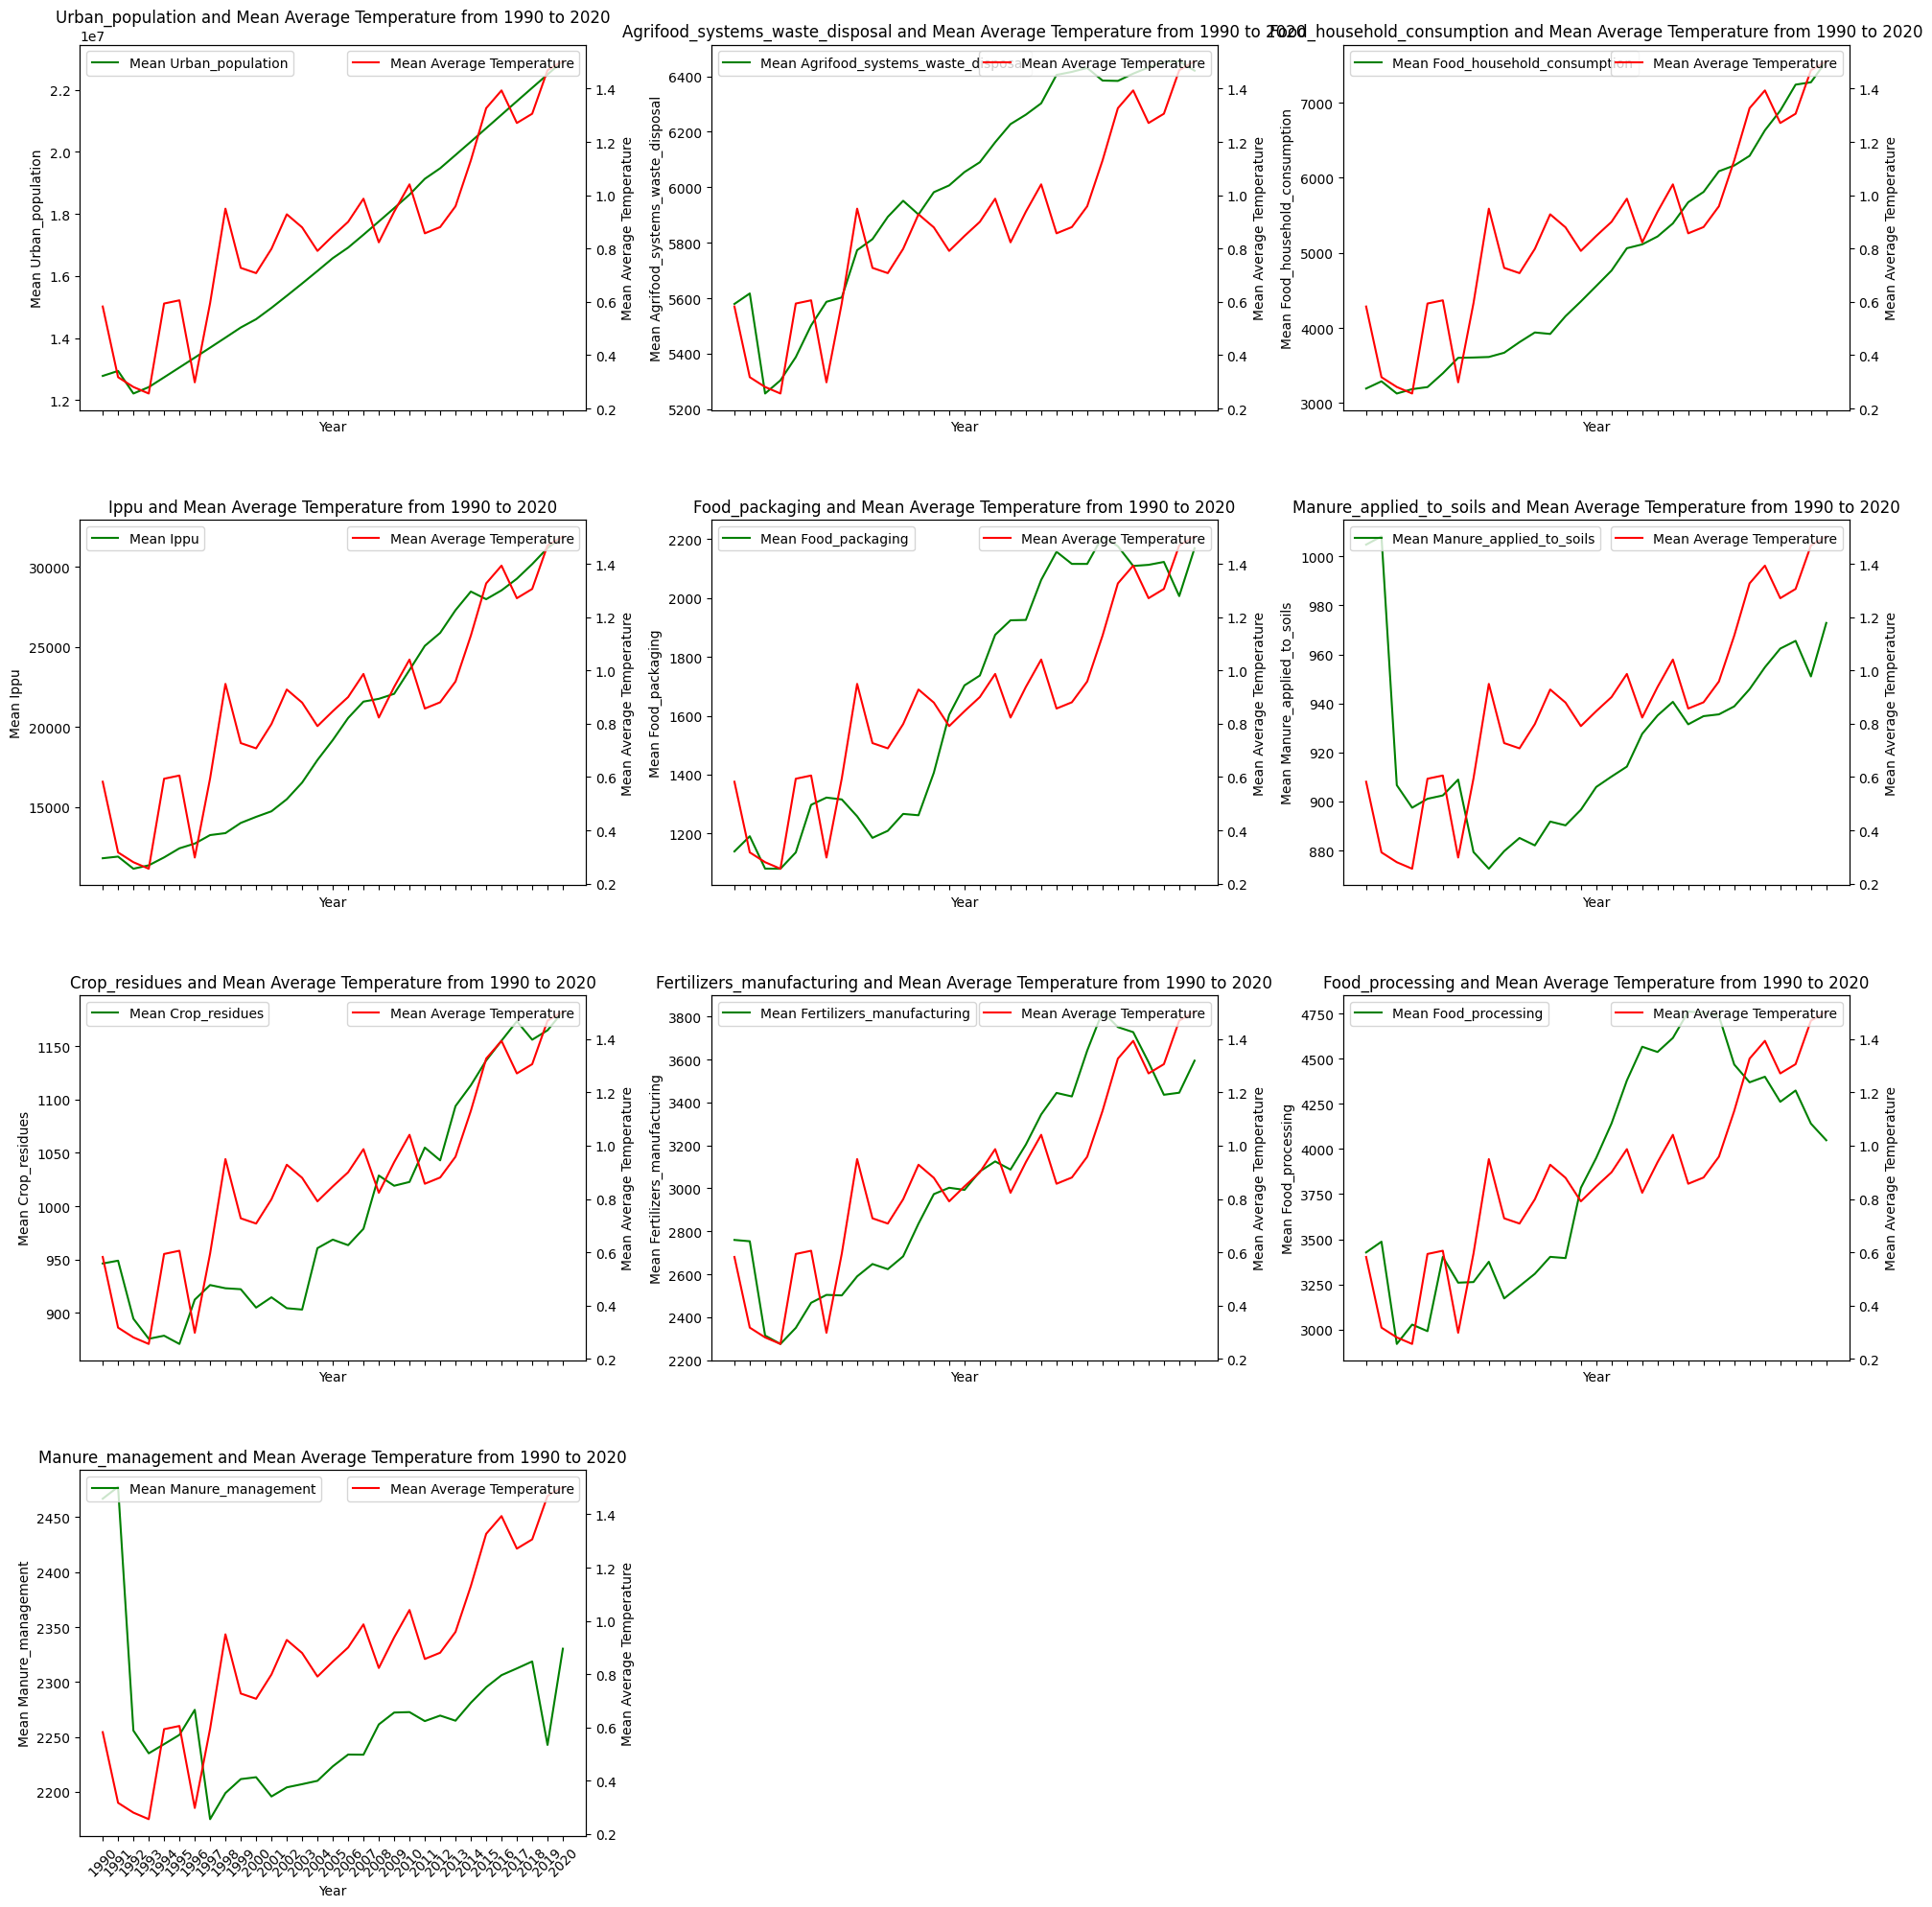

In [259]:
# Group data by year and calculate the mean average temperature for each year
mean_temperature_by_year = df_copy.groupby(df_copy['year'].dt.year)['average_temperature'].mean()

# Select highly correlated columns excluding 'total_emission'
high_corr_columns = ['urban_population', 'agrifood_systems_waste_disposal',
                     'food_household_consumption', 'ippu', 'food_packaging',
                     'manure_applied_to_soils', 'crop_residues', 'fertilizers_manufacturing',
                     'food_processing', 'manure_management']

# Create a grid of line graphs for each highly correlated column along with mean average temperature
num_plots = len(high_corr_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharex=True)

# Plot each highly correlated variable along with mean average temperature
for i, column in enumerate(high_corr_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    mean_column_by_year = df_copy.groupby(df_copy['year'].dt.year)[column].mean()
    ax.plot(mean_column_by_year.index, mean_column_by_year.values, label=f'Mean {column.capitalize()}', color='green')
    ax.set_ylabel(f'Mean {column.capitalize()}')
    ax.legend(loc='upper left')

    # Add mean average temperature to the same subplot
    ax2 = ax.twinx()
    ax2.plot(mean_temperature_by_year.index, mean_temperature_by_year.values, label='Mean Average Temperature', color='red')
    ax2.set_ylabel('Mean Average Temperature')
    ax2.legend(loc='upper right')

    # Set title for each subplot
    ax.set_title(f'{column.capitalize()} and Mean Average Temperature from 1990 to 2020')

    # Set x-axis labels for each subplot
    ax.set_xlabel('Year')
    ax.set_xticks(mean_column_by_year.index)
    ax.set_xticklabels(mean_column_by_year.index, rotation=45)

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust layout and spacing
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Adjust the height space between plots

plt.show()

Urban Population and Mean Average Temperature (1990-2020):
Observation: Both urban population and mean average temperature show a steady increase over the 30-year period.
Insight: The increase in urban population might correlate with increased energy consumption and waste generation, potentially contributing to the rise in average temperature.
Recommendation: Investigate urban planning and development policies that incorporate sustainability to mitigate temperature rise.

Agrifood Systems, Waste Disposal, and Mean Average Temperature (1990-2020):
Observation: Emissions from agrifood systems and waste disposal show fluctuations but generally trend upwards, alongside a consistent increase in temperature.
Insight: The peaks in emissions might be linked to specific policy changes or industrial practices that temporarily increased emissions.
Recommendation: Focus on improving waste management and efficiency in food systems to reduce emissions.

Household Consumption and Mean Average Temperature (1990-2020):
Observation: Household consumption emissions have increased, mirroring the rise in temperature.
Insight: As household consumption increases, so does the demand for energy, likely contributing to higher temperatures.
Recommendation: Promote energy-efficient appliances and reduce household energy consumption.

IPPU and Mean Average Temperature (1990-2020):
Observation: Emissions from industrial processes and product use (IPPU) have risen sharply, correlating with the increase in temperature.
Insight: Industrial growth might be driving both IPPU emissions and temperature increases.
Recommendation: Implement stricter emissions regulations in industrial sectors and encourage clean technology adoption.

Food Packaging and Mean Average Temperature (1990-2020):
Observation: A significant rise in emissions from food packaging is observed, alongside rising temperatures.
Insight: The growth in convenience food consumption could be contributing to increased packaging waste and emissions.
Recommendation: Encourage the use of biodegradable or reusable packaging solutions.

Manure Applied to Soils and Mean Average Temperature (1990-2020):
Observation: Emissions from manure applied to soils show a gradual increase, with a notable rise in temperature.
Insight: Agricultural practices, including the use of manure as fertilizer, might be influencing temperature changes.
Recommendation: Promote sustainable agricultural practices and the use of environmentally friendly fertilizers.

Crop Residues and Mean Average Temperature (1990-2020):
Observation: Emissions from crop residues are increasing, paralleling the temperature rise.
Insight: Residue burning or decomposition could be contributing significantly to emissions.
Recommendation: Implement management practices that reduce crop residue burning.

Fertilizers Manufacturing and Mean Average Temperature (1990-2020):
Observation: Emissions from fertilizer manufacturing show a general upward trend, along with temperature.
Insight: The production of chemical fertilizers is likely a significant source of emissions.
Recommendation: Encourage the use of organic fertilizers and improve manufacturing efficiency.

Food Processing and Mean Average Temperature (1990-2020):
Observation: Emissions from food processing have increased, with a corresponding rise in temperature.
Insight: The expansion of the food processing industry could be driving both emissions and temperature increases.
Recommendation: Enhance energy efficiency in food processing plants.

Manure Management and Mean Average Temperature (1990-2020):
Observation: Emissions from manure management show variability but an overall upward trend, alongside rising temperatures.
Insight: Ineffective manure management can release significant amounts of greenhouse gases.
Recommendation: Improve manure management systems to reduce emissions.

Overall,each graph illustrates a specific source of emissions within the agri-food sector and its correlation with rising temperatures, suggesting that increased emissions from various agri-food activities could be contributing to global warming. The consistent upward trend in temperature across all graphs underscores the need for integrated and sustainable practices across all sectors to mitigate climate change.

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [287]:
# Calculate the split year for the 70-30 split

# Check if 'year' column is in datetime format and extract the year if true
if pd.api.types.is_datetime64_any_dtype(df_copy['year']):
    df_copy['year'] = df_copy['year'].dt.year

# The area column is categorical, thus dummy variable will be created for it to be included in the predictor variables
df_dummies = pd.get_dummies(df_copy, drop_first=True)

# set the year range for training and testing data
train_start_year = 1990
train_end_year = 2011
test_start_year = 2012
test_end_year = 2020

# create a mask for training data (1990-2011)
train_mask = (df_dummies['year'] >= train_start_year) & (df_dummies['year'] <= train_end_year)

# create a mask for testing data (2012-2020)
test_mask = (df_dummies['year'] >= test_start_year) & (df_dummies['year'] <= test_end_year)

# create separate dataframes for training and testing data
train_df = df_dummies[train_mask]
test_df = df_dummies[test_mask]

print(train_df.shape)  # (data from 1990-2011)
print(test_df.shape)   # (data from 2012-2020).head()

(4922, 265)
(2043, 265)


Next we check how the independent variables correlate with the dependent variable (`average_temperature`)

In [263]:
sorted_correlation_coefficients = df_dummies.corr(numeric_only=True)['average_temperature'].sort_values(ascending=False)
print(sorted_correlation_coefficients)

average_temperature                      1.000000
food_transport                           0.075724
area_Estonia                             0.075550
food_retail                              0.073404
area_Belarus                             0.072437
                                           ...   
area_Chile                              -0.058586
area_Zimbabwe                           -0.066460
area_Marshall Islands                   -0.071821
area_Cook Islands                       -0.075245
area_Micronesia (Federated States of)   -0.075854
Name: average_temperature, Length: 264, dtype: float64


All the independent variables either have a low and no correlation to the dependent variable except for the `year` column.Standardization and scaling of the data  will ensure that all features are treated equally and have similar scales.

# <font color=red> 6. Data Pre-processing</font>

In [276]:
# Imports the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [277]:
# Creates standardization object
scaler = StandardScaler()

In [278]:
# Separates the features from the response
X = train_df.drop(['average_temperature'], axis=1) # Independent variable
y = train_df['average_temperature'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['average_temperature'], axis=1), train_df['average_temperature'], test_size=0.2)

# Split the test data
X_test1, X_test2, y_test1, y_test2 = train_test_split(test_df.drop(['average_temperature'], axis=1), test_df['average_temperature'], test_size=0.2)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <font color=red> 7. Model training and evaluation</font>

We train and evaluate our data to recognize patterns, relationships, and correlations between the input features and the target output.We also want to assess how well our models perform on unseen data.This allows us to choose an appropriate model for the project.

In [279]:
def training_and_evaluating_model(model):

    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return model, r2, mse

## 7.1 Multiple linear regression model

In [280]:
# Train and evaluate the multiple linear regression model
linear_model, linear_r2, linear_mse = training_and_evaluating_model(LinearRegression())
print(f"Linear regression - R²: {linear_r2}, MSE: {linear_mse}")

Linear regression - R²: 0.33448378275148594, MSE: 0.16260562293071915


A Coefficient of Determination(R²) of 0.334 means that about 33.4% of the variation in the dependent variable can be explained by the independent variables. This relatively moderate to low R² value, indicates that there may be other factors influencing the dependent variable that are not captured by this linear regression model.The MSE is approximately 0.157, which means that on average, the predicted values are about 0.162 units away from the actual values.The MSE value suggests that the model is not very accurate, with a relatively large average error between predicted and actual values.

## 7.2 Decision tree regression model

In [281]:
# Train and evaluate the decision tree regression model
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model, tree_r2, tree_mse = training_and_evaluating_model(tree_model)
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")

Decision tree regression - R²: 0.27860571567794545, MSE: 0.17625831488497795


In this case, the R² value is approximately 0.279, which means that about 27.9% of the variability in the target variable is explained by the decision tree model.The MSE is approximately 0.176, which suggests that the average difference between predicted and actual values is relatively small.The decision tree regression model has a moderate level of explanatory power and accuracy. While it's not a perfect fit, it still provides some useful insights and predictions.However, there may be opportunities to improve the model's performance.

## 7.3 Random forest regression model

Deciding to include the Random forest regression model was based on the performance of the Decision regression model.We wanted to see if combing multple decision trees will improve the overall perfomamce of the model.

In [282]:
# Import the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate the random forest regression model
forest_model, forest_r2, forest_mse = training_and_evaluating_model(RandomForestRegressor(max_depth=4))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")

Random Forest Regression - R²: 0.2880691384970169, MSE: 0.1739461161395982


 The R² value is around 0.288, which means that about 28.8% of the variance in the target variable is explained by the predictor variables.The MSE value for random forest regression is slightly lower than for decision tree regression, indicating that random forest regression may produce slightly more accurate predictions.

## 7.4 Stacking ensemble model

In [283]:
from sklearn.ensemble import StackingRegressor

In [284]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', linear_model),
    ('random_forest', forest_model),
    ('decision_tree', tree_model)
]

# Define the meta-learner
final_estimator = forest_model

In [285]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_mse = training_and_evaluating_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5))
print(f"Stacking Regression - R²: {stacking_r2}, MSE: {stacking_mse}")

Stacking Regression - R²: 0.39870522339971604, MSE: 0.14691439393965433


The R² value is around 0.398, which means that the Stacking Regression explains about 39.8% of the variation in the target variable.The MSE value for stacking regression is significantly lower than for all other models, indicating that stacking regression may produce more accurate predictions.

# <font color=red>8. Model Performance Comparison</font>

Plotting a bar chart is great way to visualize and compare the performance of different machine learning models. The bar chart below shows the performance of the four preferred models.By comparing the heights of the bars, we can quickly see which models perform better on each metric and which models have similar performance across multiple metrics.

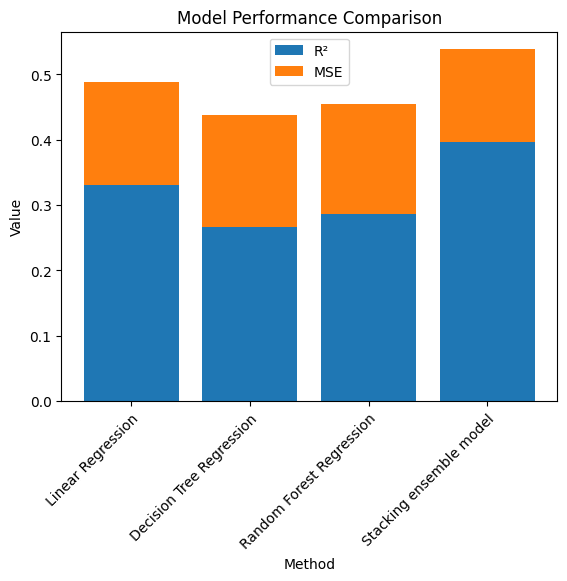

In [286]:
# Defines the data
methods = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression','Stacking ensemble model']
r2_values = [0.33068066728196055,  0.2661825657264012, 0.286485727972865,0.3969738278224506]
mse_values = [ 0.15716642949806026,0.17231157148839463, 0.16754407806363683,0.14159978016794195]

# Creates the figure and axis
fig, ax = plt.subplots()

# Creates the bar plot
ax.bar(methods, r2_values, label='R²')
ax.bar(methods, mse_values, bottom=r2_values, label='MSE')

# Sets the title and labels
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Method') 
ax.set_ylabel('Value')

# Adds a legend
ax.legend()

# Rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Shows the plot
plt.show()

Given these metrics, the Stacking Regression is a more suitable model for this project. It has a slightly higher R² than Random Forest Regression and a slightly lower MSE than Linear Regression. The stacking regression model can help avoid overfitting by combining the predictions from multiple base models(linear regression, decision tree regression, and random forest regression) , which can reduce the risk of overfitting.It also takes advantage of their strengths and minimizes their weaknesses.The model becomes more accurate and robust compared to using a single base model.

# <font color=red>9. Conclusion</font>

- The effective strategies identified to minimize the levels of CO2 emissions and try reduce it impacts was to increase the forest land. An increase in the sizes of forest lands will help reduce the CO2 levels in the atmosphere.
- We must try to substitute the agricultural methods such as the agrifood waste disposal, that contribute fairly much CO2 and use an alternative methods that won’t have much impact.
- The developed machine learning model found most effective in predictions was the stacking regression model.


# <font color=red>10. Recommendations</font>

- Increasing the green areas in the urban areas to try manage the CO2 emission from the large population and large number of industrial activities.
- Minimize the rate of deforestation as it decreases the forest land
- Practice more CO2 safe methods of the agricultural production methods and processes.
- Increase more organic farming, which excludes the use of artificial fertilizers and pesticides


# <font color=red>11. References</font>

1.IPCC 2021, Climate Change 2021: The Physical Science Basis, the Working Group I contribution to the Sixth Assessment Report, Cambridge University Press, Cambridge, UK.

2. https://science.nasa.gov/climate-change/effects/

3. Stern, D.I. and Kaufmann, R.K., 2014. Anthropogenic and natural causes of climate change. Climatic change, 122, pp.257-269.

4. Zhu, Y. and Huo, C., 2022. The impact of agricultural production efficiency on agricultural carbon emissions in China. Energies, 15(12), p.4464.

5. Balsalobre-Lorente, D., Driha, O.M., Bekun, F.V. and Osundina, O.A., 2019. Do agricultural activities induce carbon emissions? The BRICS experience. Environmental Science and Pollution Research, 26, pp.25218-25234.
